# Nx versus T and OA

In [527]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [528]:
from pathlib import Path
from bs_fdbck.util.BSOA_datamanip import ds2df_inc_preprocessing, ds2df_echam
from bs_fdbck.util.collocate.collocateLONLAToutput import CollocateLONLATout
from bs_fdbck.util.collocate.collocate_echam_salsa import CollocateModelEcham
import useful_scit.util.log as log
from bs_fdbck.util.plot.BSOA_plots import make_cool_grid, plot_scatter
log.ger.setLevel(log.log.INFO)
import time
import xarray as xr
import matplotlib.pyplot as plt

In [529]:
from IPython import get_ipython

# noinspection PyBroadException
try:
    _ipython = get_ipython()
    _magic = _ipython.magic
    _magic('load_ext autoreload')
    _magic('autoreload 2')
except:
    pass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [530]:

import numpy as np



In [531]:
plot_path = Path('Plots')

In [532]:
def make_fn_scat(case, v_x, v_y):
    _x = v_x.split('(')[0]
    _y = v_y.split('(')[0]
    f = f'scat_all_years_echam_noresm_{case}_{_x}_{_y}-ATTO.png'
    return plot_path /f

In [533]:
plot_path.mkdir(exist_ok=True, parents=True)

# Load observational data: 

In [534]:
import pandas as pd

In [535]:
from bs_fdbck.constants import measurements_path

In [536]:
fn = measurements_path /'SourceData_Yli_Juuti2021.xls'

df_hyy_1 = pd.read_excel(fn, sheet_name=0, header=2, usecols=range(6))

df_hyy_1.head()

df_hyy_1['date'] = df_hyy_1.apply(lambda x: f'{x.year:.0f}-{x.month:02.0f}-{x.day:02.0f}', axis=1)

df_hyy_1['date'] = pd.to_datetime(df_hyy_1['date'] )



In [537]:
fn = measurements_path /'SourceData_Yli_Juuti2021.xls'

df_hyy_2 = pd.read_excel(fn, sheet_name=2, header=2, usecols=range(6))

df_hyy_2.head()

df_hyy_2['date'] = df_hyy_2.apply(lambda x: f'{x.year:.0f}-{x.month:02.0f}-{x.day:02.0f}', axis=1)

df_hyy_2['date'] = pd.to_datetime(df_hyy_2['date'] )

df_hyy_2

df_hyy_2['date'] = df_hyy_2.apply(lambda x: f'{x.year:.0f}-{x.month:02.0f}-{x.day:02.0f}', axis=1)

df_hyy_2['date'] = pd.to_datetime(df_hyy_2['date'] )

df_hyy_2 = df_hyy_2.set_index('date')

In [538]:
df_hyy_2

year  month  day  T (degree C)  AOD_340 nm  AOD_500 nm
date                                                              
2012-07-02  2012      7    2     16.753083    0.117652    0.065783
2012-07-03  2012      7    3     17.366916    0.148389    0.082933
2012-07-04  2012      7    4     18.099667    0.144905    0.078666
2012-07-06  2012      7    6     18.627832    0.173471    0.087554
2012-07-20  2012      7   20     13.770333    0.149718    0.090444
...          ...    ...  ...           ...         ...         ...
2018-08-08  2018      8    8     20.297500    0.084738    0.047252
2018-08-16  2018      8   16     17.330334    0.229233    0.149357
2018-08-19  2018      8   19     15.192917    0.088741    0.056444
2018-08-21  2018      8   21     11.036416    0.108817    0.073775
2018-08-29  2018      8   29     15.028000    0.211001    0.150221

[70 rows x 6 columns]

In [539]:
df_hyy_1 = df_hyy_1.set_index('date')

In [540]:
df_hyy_1 = pd.merge(df_hyy_1,df_hyy_2[['AOD_340 nm','AOD_500 nm']], left_index=True, right_index=True,how="outer",)

In [541]:
df_hyy_1.index = df_hyy_1.index.rename('time')

In [542]:
df_hyy_1.head()

year  month  day  T (degree C)  OA (microgram m^-3)  N100 (cm^-3)  \
time                                                                            
2012-07-01  2012      7    1     17.308417             3.014541    781.245471   
2012-07-02  2012      7    2     16.753084             1.697459    635.103339   
2012-07-03  2012      7    3     17.366917             2.350536    745.212064   
2012-07-04  2012      7    4     18.099667             2.118566    734.009356   
2012-07-05  2012      7    5     19.267666             3.413631   1019.238450   

            AOD_340 nm  AOD_500 nm  
time                                
2012-07-01         NaN         NaN  
2012-07-02    0.117652    0.065783  
2012-07-03    0.148389    0.082933  
2012-07-04    0.144905    0.078666  
2012-07-05         NaN         NaN

In [543]:
from bs_fdbck.util.EBAS_data import get_ebas_dataset_Nx_daily_JA_median_df



#ds_ebas_Nx = get_ebas_dataset_with_Nx()

df_ebas_Nx, ds_ebas_Nx = get_ebas_dataset_Nx_daily_JA_median_df()#x_list = [90,100,110,120])

Importing files: 
[PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/EBAS/raw_data/SMR/FI0050R.20120101000000.20181205100800.dmps.particle_number_size_distribution.pm10.1y.1h.FI03L_UHEL_DMPS_HYY_01.FI03L__TRY_TDMPS.lev2.nc'), PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/EBAS/raw_data/SMR/FI0050R.20130101000000.20220222151057.dmps.particle_number_size_distribution.pm10.1y.1h.FI03L_UHEL_DMPS_HYY_01.FI03L__TRY_TDMPS.lev2.nc'), PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/EBAS/raw_data/SMR/FI0050R.20140101000000.20220222151057.dmps.particle_number_size_distribution.pm10.1y.1h.FI03L_UHEL_DMPS_HYY_01.FI03L__TRY_TDMPS.lev2.nc'), PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/EBAS/raw_data/SMR/FI0050R.20150101000000.20220222151057.dmps.particle_number_size_distribution.pm10.1y.1h.FI03L_UHEL_DMPS_HYY_01.FI03L__TRY_TDMPS.lev2.nc'), PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/EBAS/raw_data/SMR/FI0050R.20160101000000.2022022

/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/bs_fdbck/util/EBAS_data/__init__.py:213: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_JA.mean()
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/bs_fdbck/util/EBAS_data/__init__.py:216: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_JA.median())


In [544]:
fn = measurements_path /'SourceData_Yli_Juuti2021.xls'

df_hyy_1y = pd.read_excel(fn, sheet_name=0, header=2, usecols=range(7,12),nrows=7)

df_hyy_1y.head()
df_hyy_1y= df_hyy_1y.rename({'year.1':'year',
                            'T (degree C).1':'T (degree C)',
                             'OA (microgram m^-3).1':'OA (microgram m^-3)',
                             'N100 (cm^-3).1':'N100 (cm^-3)'
                            }, axis=1)
#df_hyy_1y['year'] = pd.to_datetime(df_hyy_1y['year'].apply(x:str(x)))

df_hyy_1y

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/io/excel/_base.py:1272: FutureWarning: Defining usecols with out of bounds indices is deprecated and will raise a ParserError in a future version.
  return self._reader.parse(


year  T (degree C)  OA (microgram m^-3)  N100 (cm^-3)
0  2012     14.819834             2.286611    485.015920
1  2013     16.061833             2.266324    458.851509
2  2014     18.469334             4.102861    706.239261
3  2015     14.949500             2.167607    499.026618
4  2016     13.959500             1.693031    418.417730
5  2017     13.619333             1.845648    409.297699
6  2018     17.848833             3.366803    770.183131

In [545]:
df_hyy_1y['year'] = df_hyy_1y['year'].apply(lambda x:f'{x:.0f}')

df_hyy_1y['date'] = df_hyy_1y['year']
df_hyy_1y = df_hyy_1y.set_index('date')



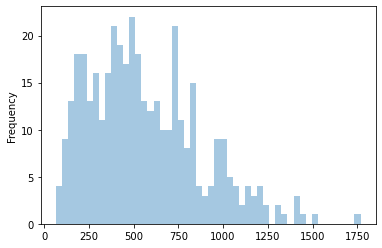

In [546]:
df_hyy_1['N100 (cm^-3)'].plot.hist(bins=50, alpha=0.4, label='obs')

plt.show()



## Why is my method 20% off their method? Is it integration?

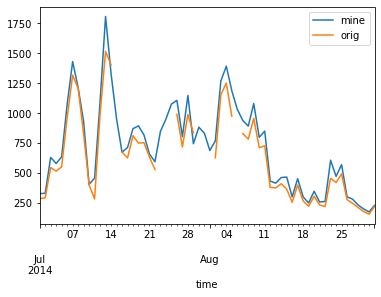

1.13207410632531


In [547]:

df_joint_hyy = pd.merge(df_ebas_Nx, df_hyy_1, left_index=True, right_index=True)
(df_joint_hyy['N100']).loc['2014-07':'2014-09'].plot(label='mine')
(df_joint_hyy['N100 (cm^-3)']).loc['2014-07':'2014-09'].plot(label='orig')
plt.legend()
plt.show()



print(df_joint_hyy['N100'][df_joint_hyy['N100 (cm^-3)'].notnull()].mean()/df_joint_hyy['N100 (cm^-3)'].mean())

# Read in model data:

### Some definitions:

In [548]:
models = ['NorESM','ECHAM-SALSA']

In [549]:
dic_mod2case={

}

## Settings:

In [550]:
nr_of_bins = 5
maxDiameter = 39.6  #    23.6 #e-9
minDiameter = 5.0  # e-9
history_field='.h1.'

In [551]:
from_t = '2012-01-01'
to_t = '2015-01-01'

In [552]:
from_t2 = '2015-01-01'
to_t2 = '2019-01-01'

## Cases:

In [553]:
dic_mod_ca = dict()
dic_df_mod_case = dict()
dic_dfsm_mod_case = dict()

### LOAD ECHAM SALSA

In [554]:



case_name = 'SALSA_BSOA_feedback'
case_name_echam = 'SALSA_BSOA_feedback'
from_time = '2012-01'
to_time = '2012-02'
time_res = 'hour'
space_res='locations'
model_name='ECHAM-SALSA'

dic_mod2case[model_name] = case_name_echam

## Settings:

In [555]:
from_t = '2012-01-01'
to_t = '2019-01-01'

In [556]:
case_mod = case_name#'OsloAero_intBVOC_f19_f19_mg17_fssp'
cases_echam = [case_name]

In [557]:
 
log.ger.info(f'TIMES:****: {from_t} {to_t}')

2022-07-03 18:34:33,661 useful_scit  INFO     TIMES:****: 2012-01-01 2019-01-01


2022-07-03 18:34:33,661 useful_scit  INFO     TIMES:****: 2012-01-01 2019-01-01


INFO:useful_scit:TIMES:****: 2012-01-01 2019-01-01


## Variables

In [558]:
varl =[
      'apm',
'geom',
'airdens',
'tempair',
'uw',
'vw',
'ccn02',
'ccn10',
'cod',
'cwp',
'ceff',
'ceff_ct',
'lcdnc',
'lcdnc_ct',
'clfr',
'cl_time',
'aot550nm',
'aot865nm',
'ang550865',
'up_sw',
'up_sw_cs',
'up_sw_noa',
'up_sw_cs_noa',
'up_lw',
'up_lw_cs',
'up_lw_noa',
'up_lw_cs_noa',
'mmrtrN500',
'mmrtrN250',
'mmrtrN200',
'mmrtrN100',
'mmrtrN50',
'mmrtrN3',
'oh_con',
'emi_monot_bio',
'emi_isop_bio',
'SO2_gas',
'APIN_gas',
'TBETAOCI_gas',
'BPIN_gas',
'LIMON_gas',
'SABIN_gas',
'MYRC_gas',
'CARENE3_gas',
'ISOP_gas',
'VBS0_gas',
'VBS1_gas',
'VBS10_gas',
'ORG_mass',
      
      
      ] 

In [559]:
for case_name in cases_echam:
    varlist = varl
    c = CollocateLONLATout(case_name, from_t, to_t,
                           True,
                           'hour',
                           model_name=model_name
                          # history_field=history_field
                          )
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/apm_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/geom_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/airdens_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/tempair_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/uw_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/vw_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hou

In [560]:
dic_ds = dict()
for ca in cases_echam:
    c = CollocateLONLATout(ca, from_t, to_t,
                           True,
                           'hour',
                           model_name=model_name
                          )
                          # history_field=history_field)
    ds = c.get_collocated_dataset(varl)
    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    dic_ds[ca]=ds.drop('station').rename(dict(locations='station'))

2022-07-03 18:34:34,234 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/apm_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/geom_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/airdens_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/tempair_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/uw_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_f

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/apm_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/geom_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/airdens_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/tempair_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/uw_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/vw_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hou

INFO:useful_scit:Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/apm_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/geom_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/airdens_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/tempair_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/uw_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/vw_SALSA_BSOA_feedbac

['//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/apm_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc', '//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/geom_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc', '//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/airdens_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc', '//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/tempair_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc', '//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/uw_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc', '//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/vw_SALSA_BSOA_feedback_2012-01-

In [561]:
dic_mod_ca['ECHAM-SALSA'] = dic_ds.copy()

## LOAD NORESM

## Settings:

In [562]:
nr_of_bins = 5
maxDiameter = 39.6  #    23.6 #e-9
minDiameter = 5.0  # e-9
history_field='.h1.'

In [563]:
from_t = '2012-01-01'
to_t = '2015-01-01'

In [564]:
from_t2 = '2015-01-01'
to_t2 = '2019-01-01'

## Cases:

In [565]:
cases_noresm1 = ['OsloAero_intBVOC_f09_f09_mg17_full']
cases_noresm2 = ['OsloAero_intBVOC_f09_f09_mg17_ssp245']

In [566]:
case_mod = 'OsloAero_intBVOC_f09_f09_mg17_fssp'
case_noresm = 'OsloAero_intBVOC_f09_f09_mg17_fssp'

In [567]:
model_name = 'NorESM'

dic_mod2case[model_name] = case_noresm

## Variables

In [568]:
varl =['N100','SOA_NA','SOA_A1','SO4_NA','DOD500','DOD440','ACTREL',#'TGCLDLWP',
       'H2SO4','SOA_LV','COAGNUCL','FORMRATE','FSNSC',
       'NUCLRATE','NCONC01','NCONC02','NCONC03','NCONC04','NCONC05','NCONC06','NCONC07',
       'NCONC08','NCONC09','NCONC10','NCONC11','NCONC12','NCONC13','NCONC14','SIGMA01',
       'SIGMA02','SIGMA03','SIGMA04','SIGMA05','SIGMA06','SIGMA07','SIGMA08','SIGMA09',
       'SIGMA10','SIGMA11','SIGMA12','SIGMA13','SIGMA14','NMR01','NMR02','NMR03','NMR04',
       'NMR05','NMR06','NMR07','NMR08','NMR09','NMR10','NMR11','NMR12','NMR13','NMR14', 
      'FSNS','FSDS_DRF','T','GR','GRH2SO4','GRSOA','TGCLDCWP','U','V', 'SO2','isoprene',
       'monoterp','GS_SO2', 'GS_H2SO4','GS_monoterp','GS_isoprene']


varl =['N100','DOD500','DOD440','ACTREL',#,'SOA_A1',
       'H2SO4','SOA_LV','COAGNUCL','FORMRATE','T',
       'NCONC01','N50','N150','N200',#'DOD500',
       #'NCONC01',
       #'SFisoprene',
       #'SFmonoterp',
       #'DOD500',
      
      'SOA_NA','SOA_A1','OM_NI','OM_AI','OM_AC','SO4_NA','SO4_A1','SO4_A2','SO4_AC','SO4_PR',
      'BC_N','BC_AX','BC_NI','BC_A','BC_AI','BC_AC','SS_A1','SS_A2','SS_A3','DST_A2','DST_A3', 
      ] 

In [569]:
for case_name in cases_noresm1:
    varlist = varl
    c = CollocateLONLATout(case_name, from_t, to_t,
                           True,
                           'hour',
                           history_field=history_field)
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/N100_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD500_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD440_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/ACTREL_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/H2SO4_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_s

In [570]:
for case_name in cases_noresm2:
    varlist = varl# list_sized_vars_noresm
    c = CollocateLONLATout(case_name, from_t2, to_t2,
                           False,
                           'hour',
                           history_field=history_field)
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/N100_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD500_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD440_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/ACTREL_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/H2SO4_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//p

In [571]:
dic_ds = dict()
for ca in cases_noresm1:
    c = CollocateLONLATout(ca, from_t, to_t,
                           False,
                           'hour',
                           history_field=history_field)
    ds = c.get_collocated_dataset(varl)
    #ds2 = c.get_collocated_dataset(['DOD500'])
    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    dic_ds[ca]=ds

2022-07-03 18:34:36,541 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/N100_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD500_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD440_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/ACTREL_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/H2SO4_OsloAero_intBVOC_f09_f09_mg17_full_2012-01

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/N100_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD500_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD440_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/ACTREL_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/H2SO4_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_s

INFO:useful_scit:Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/N100_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD500_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD440_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/ACTREL_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/H2SO4_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations

['//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/N100_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc', '//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD500_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc', '//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD440_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc', '//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/ACTREL_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc', '//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/H2SO4_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc', '//proj

In [572]:
#dic_ds = dict()
for ca in cases_noresm2:
    c = CollocateLONLATout(ca, from_t2, to_t2,
                           False,
                           'hour',
                           history_field=history_field)
    ds = c.get_collocated_dataset(varl)
    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    dic_ds[ca]=ds

2022-07-03 18:34:37,563 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/N100_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD500_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD440_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/ACTREL_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/H2SO4_OsloAero_intBVOC_f09_f09

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/N100_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD500_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD440_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/ACTREL_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/H2SO4_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//p

INFO:useful_scit:Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/N100_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD500_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD440_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/ACTREL_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/H2SO4_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-

['//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/N100_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc', '//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD500_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc', '//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD440_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc', '//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/ACTREL_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc', '//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/H2SO4_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_lo

In [573]:
case1 = cases_noresm1[0]
case2 = cases_noresm2[0]

ds1 = dic_ds[case1]
ds2 = dic_ds[case2]

st_y = from_t.split('-')[0]
mid_y_t = str(int(to_t.split('-')[0])-1)
mid_y_f = to_t.split('-')[0]
end_y = to_t2.split('-')[0]

print(st_y, mid_y_t, mid_y_f, end_y)

2012 2014 2015 2019


In [574]:
_ds1 = ds1.sel(time=slice(st_y, mid_y_t))
_ds2 = ds2.sel(time=slice(mid_y_f, end_y))
ds_comb = xr.concat([_ds1, _ds2], dim='time')#.sortby('time')

In [575]:
case_mod

'OsloAero_intBVOC_f09_f09_mg17_fssp'

In [576]:
dic_ds = {case_mod: ds_comb}

In [577]:
dic_mod_ca['NorESM'] = dic_ds.copy()

## SELECT STATION:


In [578]:
for mod in dic_mod_ca.keys():
    for ca in dic_mod_ca[mod].keys():
        dic_mod_ca[mod][ca] = dic_mod_ca[mod][ca].sel(station='ATTO')
        dic_mod_ca[mod][ca].load()

# Functions:

In [579]:
R = 287.058
pressure = 1000. #hPa
kg2ug = 1e9
temperature = 273.15

## ADJUST ECHAM

In [580]:
rn_dict_echam={
    'ORG_mass_conc' : 'OA',
    'tempair':'T',

    
}

In [581]:
model_lev_i=-1

In [582]:
from bs_fdbck.util.BSOA_datamanip import calculate_daily_median_summer,calculate_summer_median

In [583]:
standard_air_density = 100*pressure/(R*temperature)

In [584]:

df, df_sm = ds2df_echam(dic_mod_ca['ECHAM-SALSA'][case_name_echam], summer_months=range(13))




N3
N50
N100
N200
N250
N500
ORG_mass_conc
VBS1_gas_conc
VBS0_gas_conc
VBS10_gas_conc
cwp


In [585]:


_di = {case_name_echam:df}
_dism = {case_name_echam:df_sm}

dic_df_mod_case['ECHAM-SALSA']= _di.copy()
dic_dfsm_mod_case['ECHAM-SALSA'] = _dism.copy()

### NorESM

In [586]:


dic_df_sm, dic_df = ds2df_inc_preprocessing(dic_mod_ca['NorESM'], model_lev_i=-1, return_summer_median=True, summer_months=range(13))


dic_df_mod_case['NorESM'] = dic_df.copy()
dic_dfsm_mod_case['NorESM'] = dic_df_sm.copy()

hey
<xarray.Dataset>
Dimensions:   (time: 61345, lev: 32)
Coordinates:
  * time      (time) datetime64[ns] 2012-01-02 ... 2019-01-01
    station   <U4 'ATTO'
  * lev       (lev) float64 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6
Data variables: (12/34)
    ACTREL    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0
    BC_A      (time, lev) float32 1.195e-12 4.29e-12 ... 1.228e-11 1.872e-11
    BC_AC     (time, lev) float32 6.081e-16 3.395e-15 ... 8.295e-12 9.208e-12
    BC_AI     (time, lev) float32 1.696e-17 2.941e-16 ... 1.789e-11 2.026e-11
    BC_AX     (time, lev) float32 5.879e-14 1.329e-13 ... 1.352e-14 2.19e-13
    BC_N      (time, lev) float32 1.205e-13 4.01e-13 ... 1.159e-13 1.404e-12
    ...        ...
    SOA_LV    (time, lev) float32 4.583e-27 3.969e-27 ... 1.82e-12 3.118e-12
    SOA_NA    (time, lev) float32 4.964e-13 1.706e-12 ... 1.37e-10 1.591e-10
    SS_A1     (time, lev) float32 9.872e-25 2.706e-24 ... 1.612e-10 1.757e-10
    SS_A2     (time

## Merge with observations:

In [587]:
dic_df_pre = dict()#dic_df_mod_case.copy()#deep=True)
for mod in dic_df_mod_case.keys():
    dic_df_pre[mod] = dic_df_mod_case[mod].copy()

In [588]:
for mod in dic_df_mod_case.keys():
    print(mod)
    for ca in dic_df_mod_case[mod].keys():
        dic_df_mod_case[mod][ca] = pd.merge(dic_df_pre[mod][ca], df_hyy_1, right_on='time', left_on='time', how='outer')
        dic_df_mod_case[mod][ca]['year'] = dic_df_mod_case[mod][ca].index.year

ECHAM-SALSA
NorESM


In [589]:
def add_log(df, varl=None):
    if varl is None:
        varl = ['OA','N100', 'OA (microgram m^-3)','N100 (cm^-3)','N50','N150','N200']
    var_exist = df.columns
    
    varl_f = set(varl).intersection(var_exist)
    print(varl_f)
    for v in varl_f:
        df[f'log10({v})'] = np.log10(df[v])
    return df


for mod in dic_df_mod_case.keys():
    for c in dic_df_mod_case[mod].keys():
    
        dic_df_mod_case[mod][c] = add_log(dic_df_mod_case[mod][c])
        dic_dfsm_mod_case[mod][c] = add_log(dic_dfsm_mod_case[mod][c])
        
df_joint_hyy = add_log(df_joint_hyy)

{'OA', 'N200', 'N100', 'OA (microgram m^-3)', 'N100 (cm^-3)', 'N50'}
{'OA', 'N100', 'N50', 'N200'}
{'OA', 'N200', 'N100', 'OA (microgram m^-3)', 'N100 (cm^-3)', 'N150', 'N50'}
{'OA', 'N200', 'N100', 'N150', 'N50'}
{'N200', 'N100', 'OA (microgram m^-3)', 'N100 (cm^-3)', 'N150', 'N50'}


In [590]:
ca = case_mod

In [591]:
mask_obs_N = dic_df_mod_case[mod][ca]['N100 (cm^-3)'].notnull()
mask_obs_OA = dic_df_mod_case[mod][ca]['OA (microgram m^-3)'].notnull()

# Plots

## OA:

In [384]:
from bs_fdbck.util.plot.BSOA_plots import cdic_model

import seaborn as sns

from matplotlib import pyplot as plt, gridspec as gridspec

from bs_fdbck.util.plot.BSOA_plots import make_cool_grid3, make_cool_grid2

import scipy

## Fit funcs

In [385]:
from bs_fdbck.util.BSOA_datamanip.fits import *

## T to OA

In [386]:
season2month =dict(WET=[1,2,3,4,5], DRY=[6,7,8,9,10,11,12])

In [387]:
def select_months(df, season = None, month_list=None):
    if season is not None: 
        month_list = season2month[season]
    

    df['month'] = df.index.month
    return df['month'].isin(month_list)

In [388]:
from bs_fdbck.util.plot.BSOA_plots import cdic_model

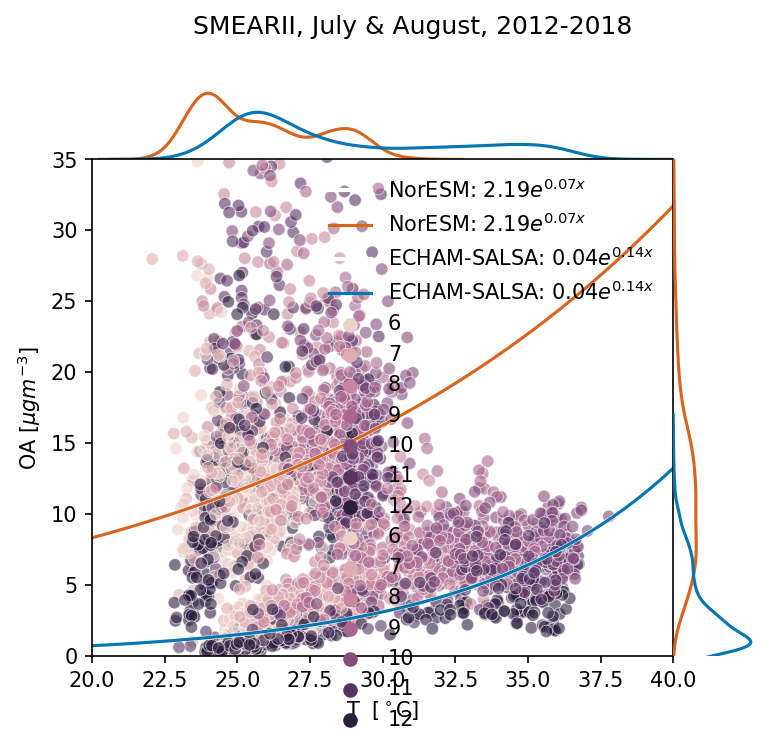

In [192]:
#fig, axs = plt.subplots(1,1,dpi=150, figsize=[5,5])
fig, ax, daxs = make_cool_grid2()
#ax = axs

## Settings
alpha_scatt = 0.6

xlab = r'T  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'

xlims = [20,40]
ylims = [0,35]
season='DRY'

# OBS: 
v_y = 'OA (microgram m^-3)'
v_x = 'T (degree C)'

ca ='OBS'
mo = 'Observations'
df_s = df_joint_hyy#.loc['2012':'2014']

mask_obs_ind = df_s[[v_x,v_y]].notna().index
"""
sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = ax,
                facecolor='none',
                edgecolor=cdic_model[mo],
                    zorder=-10,

                label='__nolegend__')
popt, pov, label, func = get_exp_fit_weight(df_s,v_x,v_y, return_func=True)
x = np.linspace(*xlims)
    
ax.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}')
ax.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))
    
popt, pov, label, func = get_exp_fit(df_s,v_x,v_y, return_func=True)
x = np.linspace(*xlims)
    
#ax.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}, eq. weight', linestyle='--')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))
    
#fig.suptitle('Observations')
sns.kdeplot(
    x= df_s[v_x], 
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['x'],
)

sns.kdeplot(
    y=df_s[v_y],
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['y'],
)
"""

# NORESM: 
v_x = 'T_C'
v_y = 'OA'

for mo in models:
    ca= dic_mod2case[mo]

    df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind]

    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()

    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    hue='month',
                    alpha=alpha_scatt, 
                    label='__nolegend__',
                    ax = ax,
                    facecolor='none',
                    #edgecolor=cdic_model[mo],
                    zorder=-10,
                    
                    
                   )
    popt, pov, label, func = get_exp_fit_weight(df_s,v_x,v_y, return_func=True)

    #popt, pov, label = get_exp_fit(df_s,v_x,v_y)
    x = np.linspace(*xlims)
    ax.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}')
    
    ax.plot(x, func(x, *popt), cdic_model[mo],label=f'{mo}: {label}')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))
    popt, pov, label, func = get_exp_fit(df_s,v_x,v_y, return_func=True)
    x = np.linspace(*xlims)
    
    #ax.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}, eq. weight', linestyle='--')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))
    

    
ax.set_xlabel(xlab)
ax.set_ylabel(ylab)
fig.suptitle('SMEARII, July & August, 2012-2018')


# 
for mo in models:
    ca= dic_mod2case[mo]

    df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind]


    sns.kdeplot(#x=v_x,
                    x= df_s[v_x], 
                    color=cdic_model[mo], 
                    label=mo,
                    ax = daxs['x'],
                    
                   )

    sns.kdeplot(#x=v_x,
                    
        y=df_s[v_y],
        #vertical=True,
                    color=cdic_model[mo], 
                    #alpha=alpha_scatt, 
                    label=mo,
                    ax = daxs['y'],
                    
                   )

ax.set_ylim(ylims)
ax.set_xlim(xlims)


fn = make_fn_scat(f'exp_fit1_simple', v_x, v_y)
ax.legend(frameon=False)

fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

In [247]:
R = 287.058
pressure_default = 1000.  # hPa
kg2ug = 1e9

lat_smr = 61.85
lon_smr = 24.28
model_lev_i = -1
temperature_default = 273.15
standard_air_density = 100 * pressure_default / (R * temperature_default)

rho = pressure * 100 / (R * temperature_default)

In [499]:
fn_noresm = '/proj/bolinc/users/x_sarbl/noresm_archive/OsloAero_intBVOC_f09_f09_mg17_full/atm/hist/OsloAero_intBVOC_f09_f09_mg17_full.cam.h0.2012-*.nc'




In [501]:
_ds_n = xr.open_mfdataset(fn_noresm)

In [210]:
_ds.sel(lat =-2.150, lon=300.9998, method='nearest').isel(lev=-1)['T'].load()-273.15

<xarray.DataArray 'T' (time: 1)>
array([26.02066], dtype=float32)
Coordinates:
    lat      float64 -2.356
    lon      float64 301.2
    lev      float64 992.6
  * time     (time) datetime64[ns] 2015-01-01
Attributes:
    mdims:         1
    units:         K
    long_name:     Temperature
    cell_methods:  time: mean

In [210]:
_ds.sel(lat =-2.150, lon=300.9998, method='nearest').isel(lev=-1)['T'].load()-273.15

<xarray.DataArray 'T' (time: 1)>
array([26.02066], dtype=float32)
Coordinates:
    lat      float64 -2.356
    lon      float64 301.2
    lev      float64 992.6
  * time     (time) datetime64[ns] 2015-01-01
Attributes:
    mdims:         1
    units:         K
    long_name:     Temperature
    cell_methods:  time: mean

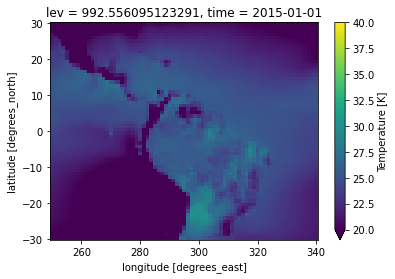

In [214]:
(_ds.isel(lev=-1)['T'].load()-273.15).sel(lat=slice(-30,30),lon=slice(250,340)).plot(vmin=20,vmax=40)

In [222]:
_df =  dic_df_mod_case['NorESM']['OsloAero_intBVOC_f09_f09_mg17_fssp']

In [ ]:
_df['FORMRATE'].resample('h').mean().plot()

<AxesSubplot:xlabel='time'>

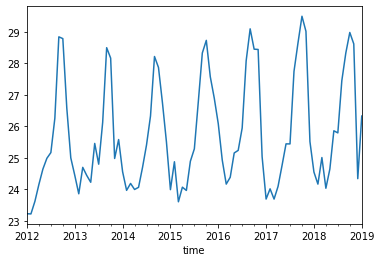

In [224]:
_df['T_C'].resample('M').mean().plot()

In [228]:
month_m = select_months(_df, month_list=[12])

<AxesSubplot:xlabel='time'>

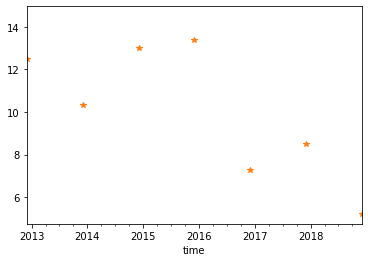

In [231]:
_df['OA'][month_m].resample('M').mean().plot()
_df['SOA_A1'][month_m].resample('M').mean().plot(marker='*')

In [ ]:
_df['T_C']

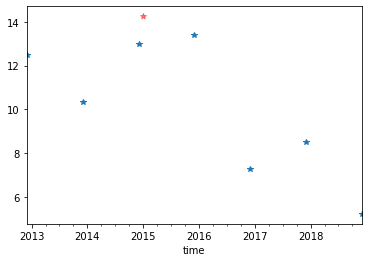

In [260]:
_df['SOA_A1'][month_m].resample('M').mean().plot(marker='*')
val_m = rho*kg2ug*(_ds.sel(lat =-2.50, lon=300.9998, method='nearest').isel(lev=-1)['SOA_A1']) 
plt.scatter(val_m['time'].values, val_m.values, marker='*', c='r', alpha=.5)
                                                                                            
                                                                                            
            
                                                                                            

In [279]:
val_m.load()
val_m2.load()

<xarray.DataArray 'T' ()>
array(26.0274, dtype=float32)
Coordinates:
    lat      float64 -2.356
    lon      float64 301.2
    lev      float64 992.6
Attributes:
    mdims:         1
    units:         K
    long_name:     Temperature
    cell_methods:  time: mean

In [298]:
for c in _df.columns:
    print(c)

ACTREL
BC_A
BC_AC
BC_AI
BC_AX
BC_N
BC_NI
COAGNUCL
DOD440
DOD500
DST_A2
DST_A3
FORMRATE
H2SO4
N100
N150
N200
N50
NCONC01
OM_AC
OM_AI
OM_NI
SO4_A1
SO4_A2
SO4_AC
SO4_NA
SO4_PR
SOA_A1
SOA_LV
SOA_NA
SS_A1
SS_A2
SS_A3
T
rho
T_C
SOA
OA
POA
SO4
hour
month_x
ismonth0
ismonth1
ismonth2
ismonth3
ismonth4
ismonth5
ismonth6
ismonth7
ismonth8
ismonth9
ismonth10
ismonth11
ismonth12
isJuly
isAug
isJA
isSummer
station
lev
year_x
year_y
month_y
day
T (degree C)
OA (microgram m^-3)
N100 (cm^-3)
AOD_340 nm
AOD_500 nm
year
log10(OA)
log10(N200)
log10(N100)
log10(OA (microgram m^-3))
log10(N100 (cm^-3))
log10(N150)
log10(N50)
month


In [450]:

val_m = rho*kg2ug*(_ds.sel(lat =-2.150, lon=300.9998, method='nearest').isel(lev=-1)['SOA_A1']) 
#val_m2 = rho*kg2ug*(_ds2.sel(lat =-2.150, lon=300.9998, method='nearest').isel(lev=-1)['SOA_A1']) 

In [451]:
val_m.load()
#val_m2.load()

<xarray.DataArray 'SOA_A1' (time: 12)>
array([ 9.300473 ,  5.9484105,  7.5991306,  7.637422 ,  6.833663 ,
       10.461413 , 12.147178 , 15.819567 , 15.433201 , 18.970247 ,
       18.692524 , 14.25931  ], dtype=float32)
Coordinates:
    lat      float64 -2.356
    lon      float64 301.2
    lev      float64 992.6
  * time     (time) datetime64[ns] 2014-02-01 2014-03-01 ... 2015-01-01
Attributes:
    mdims:         1
    units:         kg/kg
    long_name:     SOA_A1 concentration
    cell_methods:  time: mean

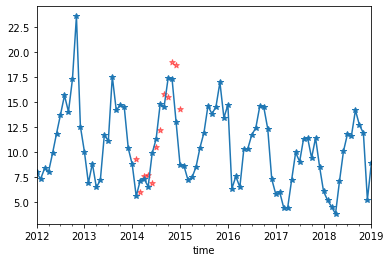

In [301]:
_df['SOA_A1'].resample('M').mean().plot(marker='*')
plt.scatter(val_m['time'].values, val_m.values, marker='*', c='r', alpha=.5)
#plt.scatter(([, val_m2.values, marker='*', c='m', alpha=.5)
                                                                                            
                                                                                            
            
                                                                                            

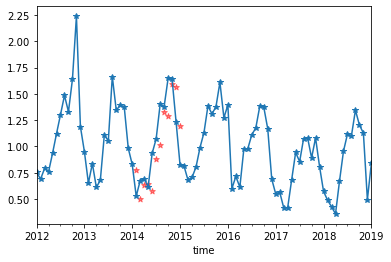

In [452]:
(_df['SOA_A1']/_df['SOA_A1'].mean()).resample('M').mean().plot(marker='*')
plt.scatter(val_m['time'].values, (val_m/val_m.mean()).values, marker='*', c='r', alpha=.5)
#plt.scatter(([, val_m2.values, marker='*', c='m', alpha=.5)
                                                                                            
                                                                                            
            
                                                                                            

In [394]:

val_m = (_ds.sel(lat =-2.150, lon=300.9998, method='nearest').isel(lev=-1)['T']) 
#val_m2 = (_ds2.sel(lat =-2.150, lon=180, method='nearest').isel(lev=-1)['T']-273.15) 

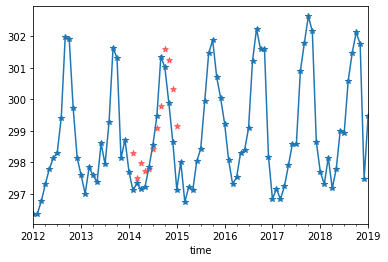

In [395]:
_df['T'].resample('M').mean().plot(marker='*')
plt.scatter(val_m['time'].values, val_m.values, marker='*', c='r', alpha=.5)
#plt.scatter((val_m['time'].values-1), val_m2.values, marker='*', c='m', alpha=.5)
                                                                                            
                                                                                            
            
                                                                                            

In [405]:

val_m = 1e-6*(_ds.sel(lat =-2.150, lon=300.9998, method='nearest').isel(lev=-1)['NCONC01']) 
#val_m2 = (_ds2.sel(lat =-2.150, lon=180, method='nearest').isel(lev=-1)['T']-273.15) 

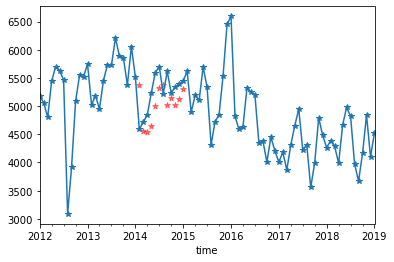

In [406]:
_df['NCONC01'].resample('M').mean().plot(marker='*')
plt.scatter(
    val_m['time'].values, 
    val_m.values, 
    marker='*', 
    c='r', 
    alpha=.5
)                                                                                           

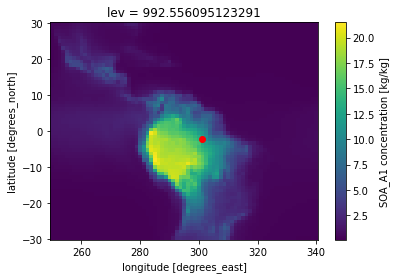

In [480]:
(kg2ug*rho*_ds.isel(lev=-1)['SOA_A1']).mean('time').sel(lat=slice(-30,30),lon=slice(250,340)).plot()
plt.scatter([300.9998],[-2.150], c='r')

In [506]:
_ds_n

<xarray.Dataset>
Dimensions:               (lat: 192, zlon: 1, nbnd: 2, lon: 288, lev: 32, ilev: 33, time: 1)
Coordinates:
  * lat                   (lat) float64 -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * zlon                  (zlon) float64 0.0
  * lon                   (lon) float64 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
  * lev                   (lev) float64 3.643 7.595 14.36 ... 957.5 976.3 992.6
  * ilev                  (ilev) float64 2.255 5.032 10.16 ... 967.5 985.1 1e+03
  * time                  (time) datetime64[ns] 2012-02-01
Dimensions without coordinates: nbnd
Data variables: (12/1279)
    zlon_bnds             (zlon, nbnd) float64 dask.array<chunksize=(1, 2), meta=np.ndarray>
    gw                    (lat) float64 dask.array<chunksize=(192,), meta=np.ndarray>
    hyam                  (lev) float64 dask.array<chunksize=(32,), meta=np.ndarray>
    hybm                  (lev) float64 dask.array<chunksize=(32,), meta=np.ndarray>
    P0                    float64 ...
    hyai                  (ilev) float64 dask.array<chunksize=(33,), meta=np.ndarray>
    ...                    ...
    mmr_OM                (time, lev, lat, lon) float32 dask.array<chunksize=(1, 32, 192, 288), meta=np.ndarray>
    mmr_SALT              (time, lev, lat, lon) float32 dask.array<chunksize=(1, 32, 192, 288), meta=np.ndarray>
    mmr_SULFATE           (time, lev, lat, lon) float32 dask.array<chunksize=(1, 32, 192, 288), meta=np.ndarray>
    monoterp              (time, lev, lat, lon) float32 dask.array<chunksize=(1, 32, 192, 288), meta=np.ndarray>
    monoterp_SRF          (time, lat, lon) float32 dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
    odms                  (time, lat, lon) float32 dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              OsloAero_intBVOC_f09_f09_mg17_full
    logname:           x_sarbl
    host:              
    initial_file:      spinup_freemet_f09_f09_mg17_from2000.cam.i.2011-01-01-...
    topography_file:   /proj/cesm_input-data/inputdata/noresm-only/inputForNu...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  month_1

In [507]:
_ds_eT

<xarray.Dataset>
Dimensions:  (time: 8784, lon: 192, lat: 96, lev: 47, nhyi: 48, nhym: 47)
Coordinates:
  * time     (time) datetime64[ns] 2012-01-01T00:52:30 ... 2012-12-31T23:52:30
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * lat      (lat) float64 88.57 86.72 84.86 83.0 ... -83.0 -84.86 -86.72 -88.57
  * lev      (lev) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 43.0 44.0 45.0 46.0 47.0
Dimensions without coordinates: nhyi, nhym
Data variables:
    hyai     (time, nhyi) float64 dask.array<chunksize=(744, 48), meta=np.ndarray>
    hybi     (time, nhyi) float64 dask.array<chunksize=(744, 48), meta=np.ndarray>
    hyam     (time, nhym) float64 dask.array<chunksize=(744, 47), meta=np.ndarray>
    hybm     (time, nhym) float64 dask.array<chunksize=(744, 47), meta=np.ndarray>
    tempair  (time, lev, lat, lon) float32 dask.array<chunksize=(744, 47, 96, 192), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 1.9.7.1 (http://mpimet.mpg.d...
    Conventions:  CF-1.6
    history:      Wed Mar 30 14:24:31 2022: cdo -O -copy -setattribute,tempai...
    CDO:          Climate Data Operators version 1.9.7.1 (http://mpimet.mpg.d...

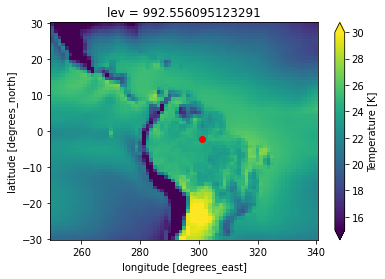

In [509]:
(_ds_n.isel(lev=-1)['T']-273.15).mean('time').sel(lat=slice(-30,30),lon=slice(250,340)).plot(vmin=15, vmax=30,  shading='flat')
plt.scatter([300.9998],[-2.150], c='r')

In [ ]:
e_temp = (_ds_eT.isel(lev=-1)['tempair']-273.15).mean('time')

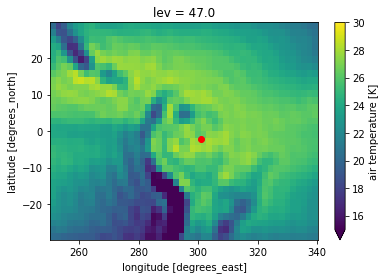

In [508]:
(e_temp.sel(lat=slice(30,-30),lon=slice(250,340))).plot(vmin=15, vmax=30, shading='flat')
plt.scatter([300.9998],[-2.150], c='r')

In [ ]:
(_ds_eT.isel(lev=-1)['tempair']-273.15).sel(lat=-2.15, lon = 300.9998, method='nearest')

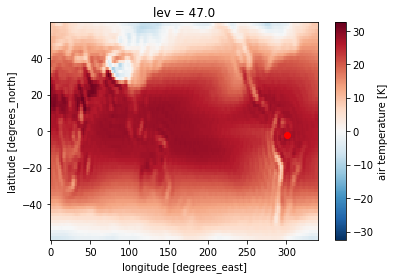

In [503]:
(_ds_eT.isel(lev=-1)['tempair']-273.15).mean('time').sel(lat=slice(60,-60),lon=slice(0,340)).plot()
plt.scatter([300.9998],[-2.150], c='r')

In [491]:
fn ='/proj/bolinc/users/x_sarbl/other_data/BS-FDBCK/ECHAM-SALSA/SALSA_BSOA_feedback/SALSA_BSOA_feedback_2012*_ORG_mass.nc'
fn2 ='/proj/bolinc/users/x_sarbl/other_data/BS-FDBCK/ECHAM-SALSA/SALSA_BSOA_feedback/SALSA_BSOA_feedback_2012*_APIN_gas.nc'
fn3 ='/proj/bolinc/users/x_sarbl/other_data/BS-FDBCK/ECHAM-SALSA/SALSA_BSOA_feedback/SALSA_BSOA_feedback_2012*_tempair.nc'



In [455]:
_ds_e = xr.open_mfdataset(fn)
_ds_e2 = xr.open_mfdataset(fn2)

In [492]:
_ds_eT = xr.open_mfdataset(fn3)

In [411]:
df_s = dic_df_mod_case['ECHAM-SALSA']['SALSA_BSOA_feedback']#.loc[mask_obs_ind]

In [415]:
df_s.columns

Index(['lon', 'APIN_gas', 'BPIN_gas', 'CARENE3_gas', 'ISOP_gas', 'LIMON_gas',
       'MYRC_gas', 'ORG_mass', 'SABIN_gas', 'SO2_gas', 'TBETAOCI_gas',
       'VBS0_gas', 'VBS10_gas', 'VBS1_gas', 'airdens', 'ang550865', 'aot550nm',
       'aot865nm', 'apm', 'ccn02', 'ccn10', 'ceff', 'ceff_ct', 'cl_time',
       'clfr', 'cod', 'cwp_orig', 'emi_isop_bio', 'emi_monot_bio', 'geom',
       'lcdnc', 'lcdnc_ct', 'mmrtrN250', 'mmrtrN3', 'mmrtrN500', 'oh_con',
       'mmrtrN100', 'mmrtrN200', 'mmrtrN50', 'T', 'up_lw', 'up_lw_cs',
       'up_lw_cs_noa', 'up_lw_noa', 'up_sw', 'up_sw_cs', 'up_sw_cs_noa',
       'up_sw_noa', 'uw', 'vw', 'N3', 'N50', 'N100', 'N200', 'N250', 'N500',
       'OA', 'VBS1_gas_conc', 'VBS0_gas_conc', 'VBS10_gas_conc', 'OAG', 'cwp',
       'ceff_um', 'lcdnc_cm3', 'T_C', 'month_x', 'ismonth0', 'ismonth1',
       'ismonth2', 'ismonth3', 'ismonth4', 'ismonth5', 'ismonth6', 'ismonth7',
       'ismonth8', 'ismonth9', 'ismonth10', 'ismonth11', 'ismonth12', 'isJuly',
       'isAug',

<AxesSubplot:xlabel='time'>

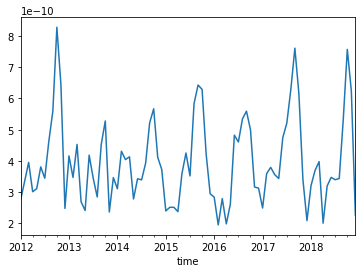

In [413]:
df_s['APIN_gas'].resample('M').mean().plot()

In [465]:
val_m = 1e-6*(_ds_e.sel(lat =-2.150, lon=300.9998, method='nearest').isel(lev=-1, )['ORG_mass']) 
val_m = val_m.resample(dict(time='M')).mean()

In [470]:
val_m2 = 1e-6*(_ds_e2.sel(ncells=4).isel(lev=-1)['APIN_gas']) 
#val_m2 = (_ds2.sel(lat =-2.150, lon=180, method='nearest').isel(lev=-1)['T']-273.15) 
val_m2 = val_m2.resample(dict(time='M')).mean()

In [466]:
val_m.load()
df_val_m = val_m.to_dataframe()['ORG_mass']

In [471]:
df_val_m2 = val_m2.to_dataframe()['APIN_gas']

<AxesSubplot:xlabel='time'>

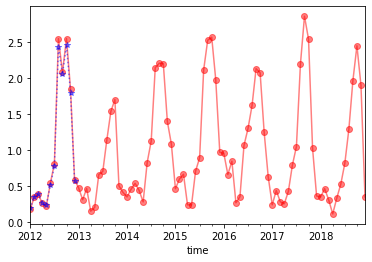

In [472]:
a= df_s['OA'].resample('M').mean()
(a/a.mean()).plot(c='r', alpha=.5, marker='o')
#plt.plot(val_m
(df_val_m/df_val_m.mean()).plot(c='b', alpha=.5, linestyle=':', marker='*')

In [473]:
df_val_m2

time
2012-01-31    3.414125e-16
2012-02-29    3.858015e-16
2012-03-31    4.497659e-16
2012-04-30    3.595757e-16
2012-05-31    3.728741e-16
2012-06-30    4.746791e-16
2012-07-31    4.465829e-16
2012-08-31    6.565648e-16
2012-09-30    8.371643e-16
2012-10-31    1.083607e-15
2012-11-30    9.209826e-16
2012-12-31    3.323702e-16
Freq: M, Name: APIN_gas, dtype: float32

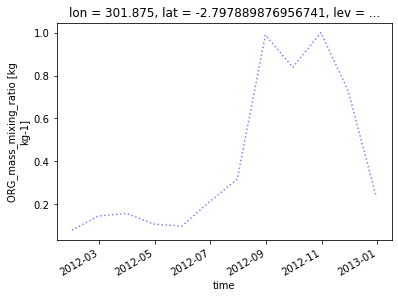

In [432]:
(val_m/val_m.max()).plot(c='b', alpha=.5, linestyle=':')

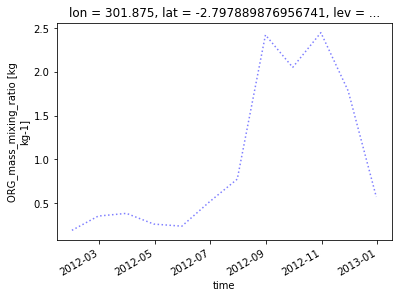

In [434]:
(val_m/val_m.mean()).plot(c='b', alpha=.5, linestyle=':')

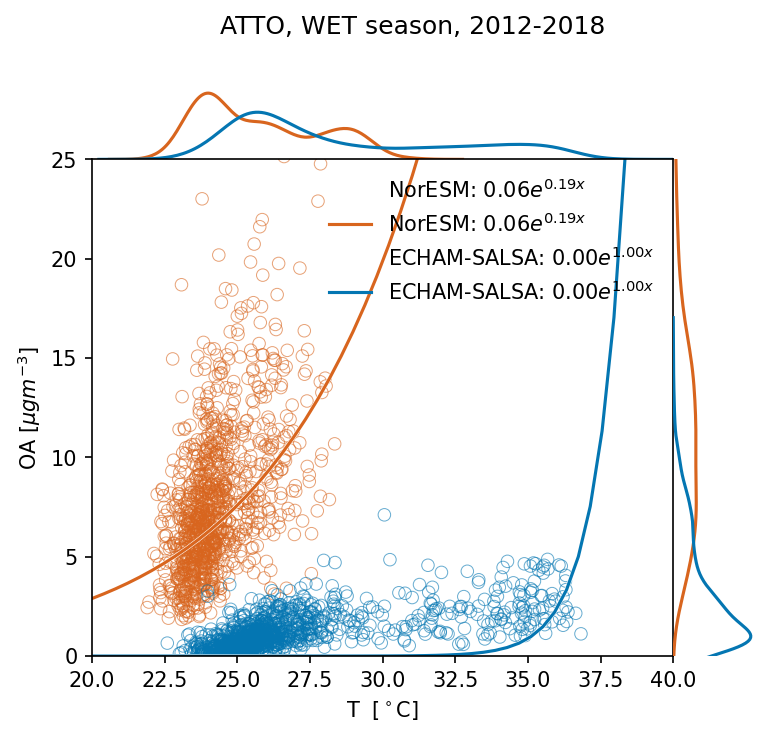

In [595]:
#fig, axs = plt.subplots(1,1,dpi=150, figsize=[5,5])
fig, ax, daxs = make_cool_grid2()
#ax = axs

## Settings
alpha_scatt = 0.6

xlab = r'T  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'

xlims = [20,40]
ylims = [0,25]

season='WET'
# OBS: 
v_y = 'OA (microgram m^-3)'
v_x = 'T (degree C)'

ca ='OBS'
mo = 'Observations'
df_s = df_joint_hyy#.loc['2012':'2014']

mask_obs_ind = df_s[[v_x,v_y]].notna().index
"""
sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = ax,
                facecolor='none',
                edgecolor=cdic_model[mo],
                    zorder=-10,

                label='__nolegend__')
popt, pov, label, func = get_exp_fit_weight(df_s,v_x,v_y, return_func=True)
x = np.linspace(*xlims)
    
ax.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}')
ax.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))
    
popt, pov, label, func = get_exp_fit(df_s,v_x,v_y, return_func=True)
x = np.linspace(*xlims)
    
#ax.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}, eq. weight', linestyle='--')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))
    
#fig.suptitle('Observations')
sns.kdeplot(
    x= df_s[v_x], 
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['x'],
)

sns.kdeplot(
    y=df_s[v_y],
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['y'],
)

"""

# NORESM: 
v_x = 'T_C'
v_y = 'OA'

for mo in models:
    ca= dic_mod2case[mo]

    df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind]

    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()

    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    #hue='month',
                    alpha=alpha_scatt, 
                    label='__nolegend__',
                    ax = ax,
                    facecolor='none',
                    edgecolor=cdic_model[mo],
                    zorder=-10,
                    
                    
                   )
    popt, pov, label, func = get_exp_fit_weight(df_s,v_x,v_y, return_func=True)

    #popt, pov, label = get_exp_fit(df_s,v_x,v_y)
    x = np.linspace(*xlims)
    ax.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}')
    
    ax.plot(x, func(x, *popt), cdic_model[mo],label=f'{mo}: {label}')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))
    popt, pov, label, func = get_exp_fit(df_s,v_x,v_y, return_func=True)
    x = np.linspace(*xlims)
    
    #ax.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}, eq. weight', linestyle='--')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))
    

    
ax.set_xlabel(xlab)
ax.set_ylabel(ylab)
fig.suptitle(f'ATTO, {season} season, 2012-2018')


# 
for mo in models:
    ca= dic_mod2case[mo]

    df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind]


    sns.kdeplot(#x=v_x,
                    x= df_s[v_x], 
                    color=cdic_model[mo], 
                    label=mo,
                    ax = daxs['x'],
                    
                   )

    sns.kdeplot(#x=v_x,
                    
        y=df_s[v_y],
        #vertical=True,
                    color=cdic_model[mo], 
                    #alpha=alpha_scatt, 
                    label=mo,
                    ax = daxs['y'],
                    
                   )

ax.set_ylim(ylims)
ax.set_xlim(xlims)


fn = make_fn_scat(f'exp_fit1_simple', v_x, v_y)
ax.legend(frameon=False)

fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

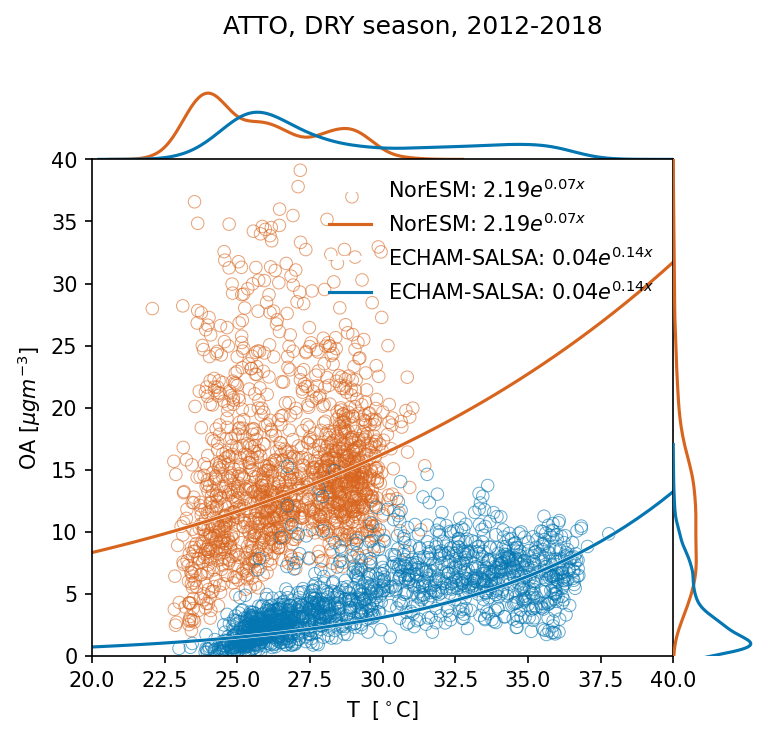

In [593]:
#fig, axs = plt.subplots(1,1,dpi=150, figsize=[5,5])
fig, ax, daxs = make_cool_grid2()
#ax = axs

## Settings
alpha_scatt = 0.6

xlab = r'T  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'

xlims = [20,40]
ylims = [0,40]

season='DRY'
# OBS: 
v_y = 'OA (microgram m^-3)'
v_x = 'T (degree C)'

ca ='OBS'
mo = 'Observations'
df_s = df_joint_hyy#.loc['2012':'2014']

mask_obs_ind = df_s[[v_x,v_y]].notna().index
"""
sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = ax,
                facecolor='none',
                edgecolor=cdic_model[mo],
                    zorder=-10,

                label='__nolegend__')
popt, pov, label, func = get_exp_fit_weight(df_s,v_x,v_y, return_func=True)
x = np.linspace(*xlims)
    
ax.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}')
ax.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))
    
popt, pov, label, func = get_exp_fit(df_s,v_x,v_y, return_func=True)
x = np.linspace(*xlims)
    
#ax.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}, eq. weight', linestyle='--')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))
    
#fig.suptitle('Observations')
sns.kdeplot(
    x= df_s[v_x], 
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['x'],
)

sns.kdeplot(
    y=df_s[v_y],
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['y'],
)

"""

# NORESM: 
v_x = 'T_C'
v_y = 'OA'

for mo in models:
    ca= dic_mod2case[mo]

    df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind]

    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()

    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    #hue='month',
                    alpha=alpha_scatt, 
                    label='__nolegend__',
                    ax = ax,
                    facecolor='none',
                    edgecolor=cdic_model[mo],
                    zorder=-10,
                    
                    
                   )
    popt, pov, label, func = get_exp_fit_weight(df_s,v_x,v_y, return_func=True)

    #popt, pov, label = get_exp_fit(df_s,v_x,v_y)
    x = np.linspace(*xlims)
    ax.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}')
    
    ax.plot(x, func(x, *popt), cdic_model[mo],label=f'{mo}: {label}')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))
    popt, pov, label, func = get_exp_fit(df_s,v_x,v_y, return_func=True)
    x = np.linspace(*xlims)
    
    #ax.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}, eq. weight', linestyle='--')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))
    

    
ax.set_xlabel(xlab)
ax.set_ylabel(ylab)
fig.suptitle(f'ATTO, {season} season, 2012-2018')


# 
for mo in models:
    ca= dic_mod2case[mo]

    df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind]


    sns.kdeplot(#x=v_x,
                    x= df_s[v_x], 
                    color=cdic_model[mo], 
                    label=mo,
                    ax = daxs['x'],
                    
                   )

    sns.kdeplot(#x=v_x,
                    
        y=df_s[v_y],
        #vertical=True,
                    color=cdic_model[mo], 
                    #alpha=alpha_scatt, 
                    label=mo,
                    ax = daxs['y'],
                    
                   )

ax.set_ylim(ylims)
ax.set_xlim(xlims)


fn = make_fn_scat(f'exp_fit1_simple', v_x, v_y)
ax.legend(frameon=False)

fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

In [71]:
df_s = dic_df_mod_case['NorESM'][case_noresm]

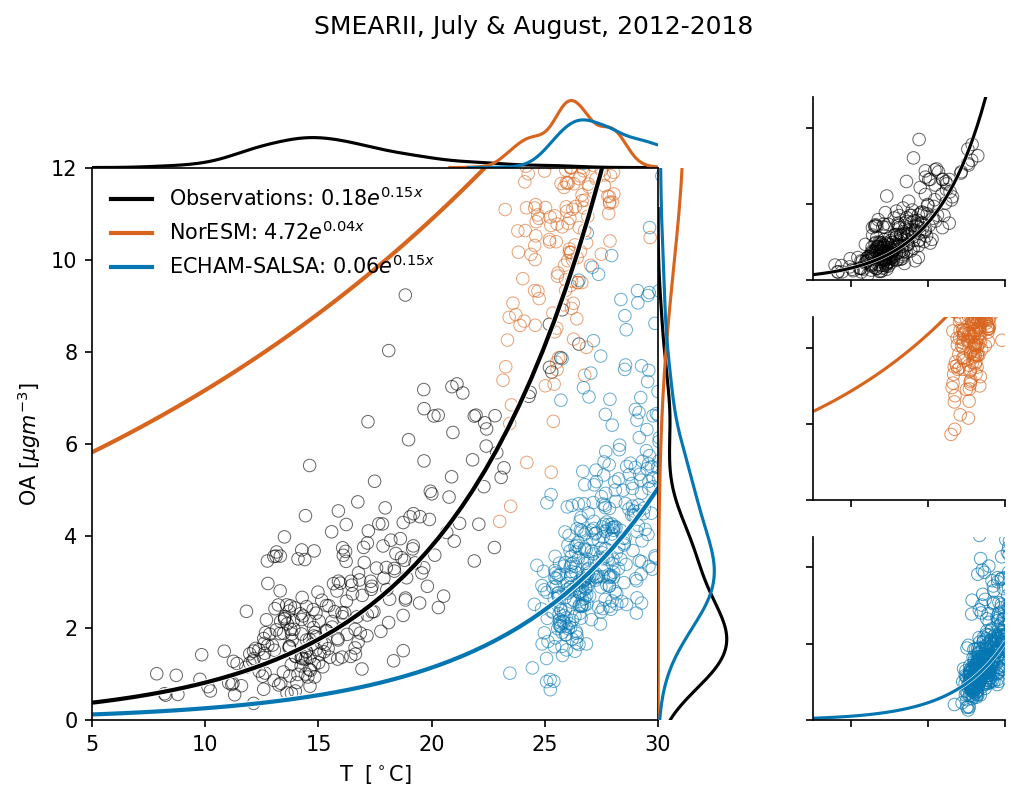

In [73]:
#fig, axs = plt.subplots(1,1,dpi=150, figsize=[5,5])
fig, ax, daxs, axs_extra = make_cool_grid3()

#ax = axs

## Settings
alpha_scatt = 0.6

xlab = r'T  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'

xlims = [5,30]
ylims = [0,12]


# OBS: 
v_y = 'OA (microgram m^-3)'
v_x = 'T (degree C)'

ca ='OBS'
mo = 'Observations'
df_s = df_joint_hyy#.loc['2012':'2014']

mask_obs_ind = df_s[[v_x,v_y]].notna().index
sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = ax,
                facecolor='none',
                edgecolor=cdic_model[mo],

                label='__nolegend__')

sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = axs_extra[0],
                facecolor='none',
                edgecolor=cdic_model[mo],

                label='__nolegend__'
               )
popt, pov, label, func = get_exp_fit_weight(df_s,v_x,v_y, return_func=True)
x = np.linspace(*xlims)
    
ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    
ax.plot(x, func(x, *popt), c=cdic_model[mo], linewidth=2,label=f'{mo}: {label}')
axs_extra[0].plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}')

axs_extra[0].plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}')

    
popt, pov, label, func = get_exp_fit(df_s,v_x,v_y, return_func=True)
x = np.linspace(*xlims)
    
#ax.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}, eq. weight', linestyle='--')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))
    

#fig.suptitle('Observations')
sns.kdeplot(
    x= df_s[v_x], 
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['x'],
)

sns.kdeplot(
    y=df_s[v_y],
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['y'],
)


# NORESM: 
v_x = 'T_C'
v_y = 'OA'

for mo, ax_ex in zip(models, axs_extra[1:]):
    ca= dic_mod2case[mo]

    df_s = dic_df_mod_case[mo][ca].loc[mask_obs_ind]


    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt, 
                    label='__nolegend__',
                    ax = ax,
                    facecolor='none',
                    edgecolor=cdic_model[mo]
                    
                    
                   )
    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt+.1, 
                    label='__nolegend__',
                    ax = ax_ex,
                    facecolor='none',
                    edgecolor=cdic_model[mo]
                    
                    
                   )

    #popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
    popt, pov, label, func = get_exp_fit_weight(df_s,v_x,v_y, return_func=True)

    x = np.linspace(*xlims)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )


    
ax.set_xlabel(xlab)
ax.set_ylabel(ylab)
fig.suptitle('SMEARII, July & August, 2012-2018')


# 
for mo in models:
    ca= dic_mod2case[mo]

    df_s = dic_df_mod_case[mo][ca].loc[mask_obs_ind]


    sns.kdeplot(#x=v_x,
                    x= df_s[v_x], 
                    color=cdic_model[mo], 
                    label=mo,
                    ax = daxs['x'],
                    
                   )

    sns.kdeplot(#x=v_x,
                    
        y=df_s[v_y],
        #vertical=True,
                    color=cdic_model[mo], 
                    #alpha=alpha_scatt, 
                    label=mo,
                    ax = daxs['y'],
                    
                   )

ax.set_ylim(ylims)
ax.set_xlim(xlims)



for ax_e in axs_extra:
    ax_e.set_xlabel('')
    ax_e.set_ylabel('')
    ax_e.set_ylim(ax.get_ylim())
    ax_e.set_xlim(ax.get_xlim())
    #ax_e.set_xticklabels
    ax_e.axes.xaxis.set_ticklabels([])
    ax_e.axes.yaxis.set_ticklabels([])
    #ax_e.axes.yaxis.set_visible(False)

    sns.despine(ax = ax_e)

fn = make_fn_scat(f'exp_fit1', v_x, v_y)
ax.legend(frameon=False)

fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

### Residuals of fit

In [74]:
import scipy

## N50

# Testing different fits

### Residuals of fit

# ! ! ! Plots with best fit

In [ ]:
#fig, axs = plt.subplots(1,1,dpi=150, figsize=[5,5])
fig, ax, daxs, axs_extra = make_cool_grid3()
#ax = axs

## Settings
alpha_scatt = 0.2

ylab = r'N$_{50}$  [cm$^{-3}$]'
xlab = r'OA [$\mu m^{-3}$]'


xlims = [0,10]

ylims = [0,5000]

# OBS: 
v_x = 'OA (microgram m^-3)'
v_y = 'N50'

ca ='OBS'
mo = 'Observations'
df_s = df_joint_hyy#.loc['2012':'2014']

mask_obs_ind = df_s[[v_x,v_y]].notna().index

sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = ax,
                facecolor='none',
                edgecolor=cdic_model[mo],

                label='__nolegend__')

sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = axs_extra[0],
                facecolor='none',
                edgecolor=cdic_model[mo],

                label='__nolegend__')

popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
x = np.linspace(*xlims)

ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    
ax.plot(x, func(x, *popt), c=cdic_model[mo], linewidth=2,label=f'{mo}: {label}')
axs_extra[0].plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}')

axs_extra[0].plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}')

    
    

#fig.suptitle('Observations')
sns.kdeplot(
    x= df_s[v_x], 
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['x'],
)

sns.kdeplot(
    y=df_s[v_y],
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['y'],
)


# NORESM: 
v_x = 'OA'
v_y = 'N50'

for mo, ax_ex in zip(models, axs_extra[1:]):
    ca= dic_mod2case[mo]

    df_s = dic_df_mod_case[mo][ca].loc[mask_obs_ind]


    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt, 
                    label='__nolegend__',
                    ax = ax,
                    facecolor='none',
                    edgecolor=cdic_model[mo]
                    
                    
                   )
    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt+.1, 
                    label='__nolegend__',
                    ax = ax_ex,
                    facecolor='none',
                    edgecolor=cdic_model[mo]
                    
                    
                   )

    popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
    x = np.linspace(*xlims)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))
    
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )

    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )

    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))
    

    
    
    
ax.set_xlabel(xlab)
ax.set_ylabel(ylab)
fig.suptitle('SMEARII, July & August, 2012-2018')


# 
for mo in models:
    ca= dic_mod2case[mo]

    df_s = dic_df_mod_case[mo][ca].loc[mask_obs_ind]


    sns.kdeplot(#x=v_x,
                    x= df_s[v_x], 
                    color=cdic_model[mo], 
                    label=mo,
                    ax = daxs['x'],
                    
                   )

    sns.kdeplot(#x=v_x,
                    
        y=df_s[v_y],
        #vertical=True,
                    color=cdic_model[mo], 
                    #alpha=alpha_scatt, 
                    label=mo,
                    ax = daxs['y'],
                    
                   )

ax.set_ylim(ylims)
ax.set_xlim(xlims)
ax.legend(frameon=True)


for ax_e in axs_extra:
    ax_e.set_xlabel('')
    ax_e.set_ylabel('')
    ax_e.set_ylim(ax.get_ylim())
    ax_e.set_xlim(ax.get_xlim())
    #ax_e.set_xticklabels
    ax_e.axes.xaxis.set_ticklabels([])
    ax_e.axes.yaxis.set_ticklabels([])
    #ax_e.axes.yaxis.set_visible(False)

    sns.despine(ax = ax_e)

#ax.set_xscale('log')
fn = make_fn_scat(f'best_fit_ln', v_x, v_y)

fig.tight_layout()

fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

In [ ]:
#fig, axs = plt.subplots(1,1,dpi=150, figsize=[5,5])
#fig, ax, daxs = make_cool_grid2()
fig, ax, daxs, axs_extra = make_cool_grid3()

#ax = axs

## Settings
alpha_scatt = 0.2

ylab = r'N$_{100}$  [cm$^{-3}$]'
xlab = r'OA [$\mu m^{-3}$]'


xlims = [0,10]

ylims = [0,3000]

# OBS: 
v_x = 'OA (microgram m^-3)'
v_y = 'N100'

ca ='OBS'
mo = 'Observations'
df_s = df_joint_hyy#.loc['2012':'2014']

mask_obs_ind = df_s[[v_x,v_y]].notna().index

sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = ax,
                facecolor='none',
                edgecolor=cdic_model[mo],

                label='__nolegend__')

sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = axs_extra[0],
                facecolor='none',
                edgecolor=cdic_model[mo],

                label='__nolegend__')

popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
x = np.linspace(*xlims)

ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    
ax.plot(x, func(x, *popt), c=cdic_model[mo], linewidth=2,label=f'{mo}: {label}')
axs_extra[0].plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}')

axs_extra[0].plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}')

    

#fig.suptitle('Observations')
sns.kdeplot(
    x= df_s[v_x], 
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['x'],
)

sns.kdeplot(
    y=df_s[v_y],
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['y'],
)


# NORESM: 
v_x = 'OA'

for mo, ax_ex in zip(models, axs_extra[1:]):
    ca= dic_mod2case[mo]

    df_s = dic_df_mod_case[mo][ca].loc[mask_obs_ind]


    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt, 
                    label='__nolegend__',
                    ax = ax,
                    facecolor='none',
                    edgecolor=cdic_model[mo]
                    
                    
                   )
    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt+.1, 
                    label='__nolegend__',
                    ax = ax_ex,
                    facecolor='none',
                    edgecolor=cdic_model[mo]
                    
                    
                   )

    popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
    x = np.linspace(*xlims)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))
    
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )

    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )

    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))
    

    
    
    
ax.set_xlabel(xlab)
ax.set_ylabel(ylab)
fig.suptitle('SMEARII, July & August, 2012-2018')


# 
for mo in models:
    ca= dic_mod2case[mo]

    df_s = dic_df_mod_case[mo][ca].loc[mask_obs_ind]


    sns.kdeplot(#x=v_x,
                    x= df_s[v_x], 
                    color=cdic_model[mo], 
                    label=mo,
                    ax = daxs['x'],
                    
                   )

    sns.kdeplot(#x=v_x,
                    
        y=df_s[v_y],
        #vertical=True,
                    color=cdic_model[mo], 
                    #alpha=alpha_scatt, 
                    label=mo,
                    ax = daxs['y'],
                    
                   )

ax.set_ylim(ylims)
ax.set_xlim(xlims)
ax.legend(frameon=True)


for ax_e in axs_extra:
    ax_e.set_xlabel('')
    ax_e.set_ylabel('')
    ax_e.set_ylim(ax.get_ylim())
    ax_e.set_xlim(ax.get_xlim())
    #ax_e.set_xticklabels
    ax_e.axes.xaxis.set_ticklabels([])
    ax_e.axes.yaxis.set_ticklabels([])
    #ax_e.axes.yaxis.set_visible(False)

    sns.despine(ax = ax_e)

#ax.set_xscale('log')
fn = make_fn_scat(f'best_fit_ln', v_x, v_y)


fig.tight_layout()

fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)





plt.show()

In [ ]:
#fig, axs = plt.subplots(1,1,dpi=150, figsize=[5,5])

fig, ax, daxs, axs_extra = make_cool_grid3()

#ax = axs

## Settings
alpha_scatt = 0.2

ylab = r'N$_{200}$  [cm$^{-3}$]'
xlab = r'OA [$\mu m^{-3}$]'

xlims = [0,10]
ylims = [0,700]

# OBS: 
v_x = 'OA (microgram m^-3)'
v_y = 'N200'

ca ='OBS'
mo = 'Observations'
df_s = df_joint_hyy#.loc['2012':'2014']

mask_obs_ind = df_s[[v_x,v_y]].notna().index

sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = ax,
                facecolor='none',
                edgecolor=cdic_model[mo],

                label='__nolegend__')

sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = axs_extra[0],
                facecolor='none',
                edgecolor=cdic_model[mo],

                label='__nolegend__')

popt, pov, label, func = get_linear_fit(df_s,v_x,v_y, return_func=True)
x = np.linspace(*xlims)
    
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))
    
ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    
ax.plot(x, func(x, *popt), c=cdic_model[mo], linewidth=2,label=f'{mo}: {label}')

axs_extra[0].plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}')

axs_extra[0].plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}')

    

#fig.suptitle('Observations')
sns.kdeplot(
    x= df_s[v_x], 
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['x'],
)

sns.kdeplot(
    y=df_s[v_y],
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['y'],
)


# NORESM: 
v_x = 'OA'

for mo, ax_ex in zip(models, axs_extra[1:]):
    
    ca= dic_mod2case[mo]

    df_s = dic_df_mod_case[mo][ca].loc[mask_obs_ind]


    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt, 
                    label='__nolegend__',
                    ax = ax,
                    facecolor='none',
                    edgecolor=cdic_model[mo]
                    
                    
                   )
    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt+.1, 
                    label='__nolegend__',
                    ax = ax_ex,
                    facecolor='none',
                    edgecolor=cdic_model[mo]
                    
                    
                   )
    popt, pov, label, func = get_linear_fit(df_s,v_x,v_y, return_func=True)
    x = np.linspace(*xlims)
    
    
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )

    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )

    
    
    
ax.set_xlabel(xlab)
ax.set_ylabel(ylab)
fig.suptitle('SMEARII, July & August, 2012-2018')


# 
for mo in models:
    ca= dic_mod2case[mo]

    df_s = dic_df_mod_case[mo][ca].loc[mask_obs_ind]


    sns.kdeplot(#x=v_x,
                    x= df_s[v_x], 
                    color=cdic_model[mo], 
                    label=mo,
                    ax = daxs['x'],
                    
                   )

    sns.kdeplot(#x=v_x,
                    
        y=df_s[v_y],
        #vertical=True,
                    color=cdic_model[mo], 
                    #alpha=alpha_scatt, 
                    label=mo,
                    ax = daxs['y'],
                    
                   )

ax.set_ylim(ylims)
ax.set_xlim(xlims)
ax.legend(frameon=False)

for ax_e in axs_extra:
    ax_e.set_xlabel('')
    ax_e.set_ylabel('')
    ax_e.set_ylim(ax.get_ylim())
    ax_e.set_xlim(ax.get_xlim())
    #ax_e.set_xticklabels
    ax_e.axes.xaxis.set_ticklabels([])
    ax_e.axes.yaxis.set_ticklabels([])
    #ax_e.axes.yaxis.set_visible(False)

    sns.despine(ax = ax_e)


#ax.set_xscale('log')

#ax.set_xscale('log')
fn = make_fn_scat(f'best_fit_lin', v_x, v_y)

fig.tight_layout()

fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)





plt.show()

## Log log fit


In [ ]:
#fig, axs = plt.subplots(1,1,dpi=150, figsize=[5,5])
fig, ax, daxs = make_cool_grid2(figsize=[5,6])
#ax = axs

## Settings
alpha_scatt = 0.6

ylab = r'log(N$_{100}$  [cm$^{-3}$])'
xlab = r'log(OA [$\mu m^{-3}$])'


#xlims = [0,12]

ylims = [1,5]
xlims =[-1,1.2]#12]

#ylims = [0,2000]


# OBS: 
v_x = 'log10(OA (microgram m^-3))'
v_y = 'log10(N100)'

ca ='OBS'
mo = 'Observations'
df_s = df_joint_hyy#.loc['2012':'2014']

mask_obs_ind = df_s[[v_x,v_y]].notna().index

sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                #alpha=alpha_scatt, 
                ax = ax,
                facecolor='none',
                edgecolor=cdic_model[mo],

                label='__nolegend__')
popt, pov, label = get_linear_fit(df_s,v_x,v_y)
x = np.linspace(*xlims)
    
ax.plot(x, func_lin_fit(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))
    
popt, pov, label = get_poly2_fit(df_s,v_x,v_y)
x = np.linspace(*xlims)
    
ax.plot(x, func_poly2_fit(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}', linestyle ='--')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))
    

    
#fig.suptitle('Observations')
sns.kdeplot(
    x= df_s[v_x], 
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['x'],
)

sns.kdeplot(
    y=df_s[v_y],
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['y'],
)


# NORESM: 
v_x = 'log10(OA)'

for mo in models:
    ca= dic_mod2case[mo]

    df_s = dic_df_mod_case[mo][ca].loc[mask_obs_ind]


    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt, 
                    label='__nolegend__',
                    ax = ax,
                    facecolor='none',
                    edgecolor=cdic_model[mo]
                    
                    
                   )
    popt, pov, label = get_linear_fit(df_s,v_x,v_y)
    x = np.linspace(*xlims)
    
    ax.plot(x, func_lin_fit(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}')
      #   label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))

    popt, pov, label = get_poly2_fit(df_s,v_x,v_y)
    x = np.linspace(*xlims)
    
    ax.plot(x, func_poly2_fit(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}', linestyle ='--')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))
    
    
    
ax.set_xlabel(xlab)
ax.set_ylabel(ylab)
fig.suptitle('SMEARII, July & August, 2012-2018')


# 
for mo in models:
    ca= dic_mod2case[mo]

    df_s = dic_df_mod_case[mo][ca].loc[mask_obs_ind]


    sns.kdeplot(#x=v_x,
                    x= df_s[v_x], 
                    color=cdic_model[mo], 
                    label=mo,
                    ax = daxs['x'],
                    
                   )

    sns.kdeplot(#x=v_x,
                    
        y=df_s[v_y],
        #vertical=True,
                    color=cdic_model[mo], 
                    #alpha=alpha_scatt, 
                    label=mo,
                    ax = daxs['y'],
                    
                   )

ax.set_ylim(ylims)
ax.set_xlim(xlims)
#ax.set_xscale('log')

fn = make_fn_scat(f'exp_fit_zoom', v_x, v_y)

fig.savefig(fn, dpi=150)


ax.legend(frameon=False)

plt.show()

In [ ]:
#fig, axs = plt.subplots(1,1,dpi=150, figsize=[5,5])
fig, ax, daxs = make_cool_grid2(figsize=[5,6])
#ax = axs

## Settings
alpha_scatt = 0.6

ylab = r'N$_{50}$  [cm$^{-3}$]'
xlab = r'OA [$\mu m^{-3}$]'


#xlims = [0,12]

ylims = [1.5,5]
xlims =[-1,1.2]#12]

#ylims = [0,2000]


# OBS: 
v_x = 'log10(OA (microgram m^-3))'
v_y = 'log10(N50)'

ca ='OBS'
mo = 'Observations'
df_s = df_joint_hyy#.loc['2012':'2014']

mask_obs_ind = df_s[[v_x,v_y]].notna().index

sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                #alpha=alpha_scatt, 
                ax = ax,
                facecolor='none',
                edgecolor=cdic_model[mo],

                label='__nolegend__')
popt, pov, label = get_linear_fit(df_s,v_x,v_y)
x = np.linspace(*xlims)
    
ax.plot(x, func_lin_fit(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))
    
popt, pov, label = get_poly2_fit(df_s,v_x,v_y)
x = np.linspace(*xlims)
    
ax.plot(x, func_poly2_fit(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}', linestyle ='--')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))
    

    
#fig.suptitle('Observations')
sns.kdeplot(
    x= df_s[v_x], 
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['x'],
)

sns.kdeplot(
    y=df_s[v_y],
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['y'],
)


# NORESM: 
v_x = 'log10(OA)'

for mo in models:
    ca= dic_mod2case[mo]

    df_s = dic_df_mod_case[mo][ca].loc[mask_obs_ind]


    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt, 
                    label='__nolegend__',
                    ax = ax,
                    facecolor='none',
                    edgecolor=cdic_model[mo]
                    
                    
                   )
    popt, pov, label = get_linear_fit(df_s,v_x,v_y)
    x = np.linspace(*xlims)
    
    ax.plot(x, func_lin_fit(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}')
      #   label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))

    popt, pov, label = get_poly2_fit(df_s,v_x,v_y)
    x = np.linspace(*xlims)
    
    ax.plot(x, func_poly2_fit(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}', linestyle ='--')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))
    
    
    
ax.set_xlabel(xlab)
ax.set_ylabel(ylab)
fig.suptitle('SMEARII, July & August, 2012-2018')


# 
for mo in models:
    ca= dic_mod2case[mo]

    df_s = dic_df_mod_case[mo][ca].loc[mask_obs_ind]


    sns.kdeplot(#x=v_x,
                    x= df_s[v_x], 
                    color=cdic_model[mo], 
                    label=mo,
                    ax = daxs['x'],
                    
                   )

    sns.kdeplot(#x=v_x,
                    
        y=df_s[v_y],
        #vertical=True,
                    color=cdic_model[mo], 
                    #alpha=alpha_scatt, 
                    label=mo,
                    ax = daxs['y'],
                    
                   )

ax.set_ylim(ylims)
ax.set_xlim(xlims)
#ax.set_xscale('log')

fn = make_fn_scat(f'exp_fit_zoom', v_x, v_y)

fig.savefig(fn, dpi=150)


ax.legend(frameon=False)

plt.show()

#### Zoom

In [ ]:
#fig, axs = plt.subplots(1,1,dpi=150, figsize=[5,5])
fig, ax, daxs = make_cool_grid2()
#ax = axs

## Settings
alpha_scatt = 0.6

ylab = r'N$_{100}$  [cm$^{-3}$]'
xlab = r'OA [$\mu m^{-3}$]'


xlims = [.3,12]

ylims = [0,2000]

# OBS: 
v_x = 'OA (microgram m^-3)'
v_y = 'N100'

ca ='OBS'
mo = 'Observations'
df_s = df_joint_hyy#.loc['2012':'2014']

mask_obs_ind = df_s[[v_x,v_y]].notna().index

sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = ax,
                facecolor='none',
                edgecolor=cdic_model[mo],

                label='__nolegend__')
popt, pov, label = get_log_fit_weight(df_s,v_x,v_y)
x = np.linspace(*xlims)
    
ax.plot(x, func_log(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))
    

popt, pov, label = get_log_fit_a0(df_s,v_x,v_y)
x = np.linspace(*xlims)
    
ax.plot(x, func_log_a0(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}', linestyle='--')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))
    
popt, pov, label, func = get_log_fit_abc_weight(df_s,v_x,v_y, return_func=True)
x = np.linspace(*xlims)
    
ax.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}', linestyle=':')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))

#fig.suptitle('Observations')
sns.kdeplot(
    x= df_s[v_x], 
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['x'],
)

sns.kdeplot(
    y=df_s[v_y],
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['y'],
)
ax.set_ylim(ylims)
ax.set_xlim(xlims)

#ax.set_xscale('log')

fn = make_fn_scat(f'exp_fit_zoom_obsOnly', v_x, v_y)

fig.savefig(fn, dpi=150)


ax.legend(frameon=False)

plt.show()

In [ ]:
#fig, axs = plt.subplots(1,1,dpi=150, figsize=[5,5])
fig, ax, daxs = make_cool_grid2()
#ax = axs

## Settings
alpha_scatt = 0.6

ylab = r'N$_{100}$  [cm$^{-3}$]'
xlab = r'OA [$\mu m^{-3}$]'


xlims = [.3,12]

ylims = [0,4000]

# OBS: 
v_x = 'OA (microgram m^-3)'
v_y = 'N50'

ca ='OBS'
mo = 'Observations'
df_s = df_joint_hyy#.loc['2012':'2014']

mask_obs_ind = df_s[[v_x,v_y]].notna().index

sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = ax,
                facecolor='none',
                edgecolor=cdic_model[mo],

                label='__nolegend__')
popt, pov, label = get_log_fit(df_s,v_x,v_y)
x = np.linspace(*xlims)
    
ax.plot(x, func_log(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))
    
popt, pov, label = get_log_fit_a0(df_s,v_x,v_y)
x = np.linspace(*xlims)
    
ax.plot(x, func_log_a0(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}', linestyle='--')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))
    

popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
x = np.linspace(*xlims)
    
ax.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}', linestyle=':')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))
    

#fig.suptitle('Observations')
sns.kdeplot(
    x= df_s[v_x], 
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['x'],
)

sns.kdeplot(
    y=df_s[v_y],
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['y'],
)
ax.set_ylim(ylims)
ax.set_xlim(xlims)

#ax.set_xscale('log')

fn = make_fn_scat(f'exp_fit_zoom_obsOnly', v_x, v_y)

fig.savefig(fn, dpi=150)


ax.legend(frameon=False)

plt.show()

In [ ]:
#fig, axs = plt.subplots(1,1,dpi=150, figsize=[5,5])
fig, ax, daxs = make_cool_grid2()
#ax = axs

## Settings
alpha_scatt = 0.6

ylab = r'N$_{100}$  [cm$^{-3}$]'
xlab = r'OA [$\mu m^{-3}$]'


xlims = [.3,12]

ylims = [0,2000]

# OBS: 
v_x = 'OA (microgram m^-3)'
v_y = 'N100'

ca ='OBS'
mo = 'Observations'
df_s = df_joint_hyy#.loc['2012':'2014']

mask_obs_ind = df_s[[v_x,v_y]].notna().index

sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = ax,
                facecolor='none',
                edgecolor=cdic_model[mo],

                label='__nolegend__')
popt, pov, label = get_linear_fit(df_s,v_x,v_y)
x = np.linspace(*xlims)
    
ax.plot(x, func_lin_fit(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))
    

popt, pov, label = get_linear_fit_a0(df_s,v_x,v_y)
x = np.linspace(*xlims)
    
ax.plot(x, func_lin_fit_a0(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}', linestyle='--')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))
    

#fig.suptitle('Observations')
sns.kdeplot(
    x= df_s[v_x], 
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['x'],
)

sns.kdeplot(
    y=df_s[v_y],
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['y'],
)
ax.set_ylim(ylims)
ax.set_xlim(xlims)

#ax.set_xscale('log')

fn = make_fn_scat(f'exp_fit_zoom_obsOnly', v_x, v_y)

fig.savefig(fn, dpi=150)


ax.legend(frameon=False)

plt.show()

### Residuals of fit

#### linear

In [ ]:

fig, ax= plt.subplots(1,1,dpi=150, figsize=[5,5])
#fig, ax, daxs = make_cool_grid2()
#ax = axs

## Settings
alpha_scatt = 0.6
ylab = r'N$_{100}$  [cm$^{-3}$]'
xlab = r'OA [$\mu m^{-3}$]'


xlims = [.1,12]

ylims = [0,5000]

# OBS: 
v_x = 'OA (microgram m^-3)'
v_y = 'N100'


ca ='OBS'
mo = 'Observations'
df_s = df_joint_hyy#.loc['2012':'2014']

mask_obs_ind = df_s[[v_x,v_y]].notna().index

popt, pov, label = get_linear_fit(df_s,v_x,v_y)
    
x_data  = df_s[v_x]
y_data  = df_s[v_y]- func_lin_fit(x_data, *popt)

sns.scatterplot(x=x_data,
                y=y_data, 
                #ata = df_s, 
                color=cdic_model[mo], 
                #alpha=alpha_scatt, 
                ax = ax,
                facecolor='none',
                edgecolor=cdic_model[mo],

                label=label)

#fig.suptitle('Observations')
# NORESM: 
v_x = 'OA'

for mo in models:
    ca= dic_mod2case[mo]

    df_s = dic_df_mod_case[mo][ca].loc[mask_obs_ind]
    popt, pov, label = get_linear_fit(df_s,v_x,v_y)
    
    x_data  = df_s[v_x]
    y_data  = df_s[v_y]- func_lin_fit(x_data, *popt)

    sns.scatterplot(x=x_data,
                y=y_data, 
                #ata = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = ax,
                facecolor='none',
                edgecolor=cdic_model[mo],

                label=label)
ax.set_xlabel(xlab)
ax.set_ylabel(ylab)
ax.set_title(r'Residuals fit: $a x+b$')

fn = make_fn_scat(f'residual3', v_x, v_y)

fig.savefig(fn, dpi=150)

ax.set_xlim(xlims)
ax.set_xscale('log')
ax.hlines(0, xmin=xlims[0],xmax=xlims[1], color='k', linewidth=1)
ax.legend(frameon=False)

plt.show()

#### log fit

In [ ]:
fig, ax= plt.subplots(1,1,dpi=150, figsize=[5,5])
#fig, ax, daxs = make_cool_grid2()
#ax = axs

## Settings
alpha_scatt = 0.6
ylab = r'N$_{100}$  [cm$^{-3}$]'
xlab = r'OA [$\mu m^{-3}$]'


xlims = [.1,12]

ylims = [0,5000]

# OBS: 
v_x = 'OA (microgram m^-3)'
v_y = 'N100'


ca ='OBS'
mo = 'Observations'
df_s = df_joint_hyy#.loc['2012':'2014']

mask_obs_ind = df_s[[v_x,v_y]].notna().index

popt, pov, label = get_log_fit(df_s,v_x,v_y)
    
x_data  = df_s[v_x]
y_data  = df_s[v_y]- func_log(x_data, *popt)

sns.scatterplot(x=x_data,
                y=y_data, 
                #ata = df_s, 
                color=cdic_model[mo], 
                #alpha=alpha_scatt, 
                ax = ax,
                facecolor='none',
                edgecolor=cdic_model[mo],

                label=label)

#fig.suptitle('Observations')
# NORESM: 
v_x = 'OA'

for mo in models:
    ca= dic_mod2case[mo]

    df_s = dic_df_mod_case[mo][ca].loc[mask_obs_ind]
    popt, pov, label = get_log_fit(df_s,v_x,v_y)
    
    x_data  = df_s[v_x]
    y_data  = df_s[v_y]- func_log(x_data, *popt)

    sns.scatterplot(x=x_data,
                y=y_data, 
                #ata = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = ax,
                facecolor='none',
                edgecolor=cdic_model[mo],

                label=label)
ax.set_xlabel(xlab)
ax.set_ylabel(ylab)
ax.set_title(r'Residuals fit: $a+ b ln(x)$')

fn = make_fn_scat(f'residual3', v_x, v_y)

fig.savefig(fn, dpi=150)

ax.set_xlim(xlims)
ax.set_xscale('log')
ax.hlines(0, xmin=xlims[0],xmax=xlims[1], color='k', linewidth=1)
ax.legend(frameon=False)

plt.show()

In [ ]:
fig, ax= plt.subplots(1,1,dpi=150, figsize=[5,5])
#fig, ax, daxs = make_cool_grid2()
#ax = axs

## Settings
alpha_scatt = 0.6
ylab = r'N$_{100}$  [cm$^{-3}$]'
xlab = r'OA [$\mu m^{-3}$]'


xlims = [.1,12]

ylims = [0,5000]

# OBS: 
v_x = 'OA (microgram m^-3)'
v_y = 'N100'


ca ='OBS'
mo = 'Observations'
df_s = df_joint_hyy#.loc['2012':'2014']

mask_obs_ind = df_s[[v_x,v_y]].notna().index

popt, pov, label = get_log_fit_abc(df_s,v_x,v_y)
    
x_data  = df_s[v_x]
y_data  = df_s[v_y]- func_log_abc(x_data, *popt)

sns.scatterplot(x=x_data,
                y=y_data, 
                #ata = df_s, 
                color=cdic_model[mo], 
                #alpha=alpha_scatt, 
                ax = ax,
                facecolor='none',
                edgecolor=cdic_model[mo],

                label=label)

#fig.suptitle('Observations')
# NORESM: 
v_x = 'OA'

for mo in models:
    ca= dic_mod2case[mo]
    

    df_s = dic_df_mod_case[mo][ca].loc[mask_obs_ind]
    popt, pov, label = get_log_fit_abc(df_s,v_x,v_y)
    
    x_data  = df_s[v_x]
    y_data  = df_s[v_y]- func_log_abc(x_data, *popt)

    sns.scatterplot(x=x_data,
                y=y_data, 
                #ata = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = ax,
                facecolor='none',
                edgecolor=cdic_model[mo],

                label=label)
ax.set_xlabel(xlab)
ax.set_ylabel(ylab)
ax.set_title(r'Residuals fit: $a+ b ln(x+c)$')

fn = make_fn_scat(f'residual3', v_x, v_y)

fig.savefig(fn, dpi=150)

ax.set_xlim(xlims)
ax.set_xscale('log')
ax.hlines(0, xmin=xlims[0],xmax=xlims[1], color='k', linewidth=1)
ax.legend(frameon=False)

plt.show()

#### Meaning of this fit? 
$$
\begin{align}
 y = & a+bln(x+c) \\
 exp(\frac{y-a}{b}) = & (x+c) \\
 x = &  exp(\frac{y-a}{b})-c
\end{align}
$$

#### Meaning of this fit? 
$$
\begin{align}
 y = & a+bln(x+c) \\
 x = &  exp(\frac{y-a}{b})-c = \alpha exp(\beta y) - c
\end{align}
$$

In [ ]:
fig, ax= plt.subplots(1,1,dpi=150, figsize=[5,5])
#fig, ax, daxs = make_cool_grid2()
#ax = axs

## Settings
alpha_scatt = 0.6
ylab = r'log(N$_{100}$  [cm$^{-3}$])'
xlab = r'log(OA [$\mu m^{-3}$])'


xlims = [-1,1]

ylims = [0,5000]

# OBS: 
v_x = 'log10(OA (microgram m^-3))'
v_y = 'log10(N100)'


ca ='OBS'
mo = 'Observations'
df_s = df_joint_hyy#.loc['2012':'2014']

mask_obs_ind = df_s[[v_x,v_y]].notna().index

popt, pov, label = get_linear_fit(df_s,v_x,v_y)
    
x_data  = df_s[v_x]
y_data  = df_s[v_y]- func_lin_fit(x_data, *popt)

sns.scatterplot(x=x_data,
                y=y_data, 
                #ata = df_s, 
                color=cdic_model[mo], 
                #alpha=alpha_scatt, 
                ax = ax,
                facecolor='none',
                edgecolor=cdic_model[mo],

                label=label)

#fig.suptitle('Observations')
# NORESM: 
v_x = 'log10(OA)'

for mo in models:
    ca= dic_mod2case[mo]

    df_s = dic_df_mod_case[mo][ca].loc[mask_obs_ind]
    popt, pov, label = get_linear_fit(df_s,v_x,v_y)
    
    x_data  = df_s[v_x]
    y_data  = df_s[v_y]- func_lin_fit(x_data, *popt)

    sns.scatterplot(x=x_data,
                y=y_data, 
                #ata = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = ax,
                facecolor='none',
                edgecolor=cdic_model[mo],

                label=label)
ax.set_xlabel(xlab)
ax.set_ylabel(ylab)
ax.set_title(r'Residuals fit: $ax+ b$')

fn = make_fn_scat(f'residual3', v_x, v_y)

fig.savefig(fn, dpi=150)

#ax.set_xlim(xlims)
ax.hlines(0, xmin=xlims[0],xmax=xlims[1], color='k', linewidth=1)
ax.legend(frameon=False)

plt.show()

## N200

### Linear fit

In [ ]:
#fig, axs = plt.subplots(1,1,dpi=150, figsize=[5,5])
fig, ax, daxs = make_cool_grid2()
#ax = axs

## Settings
alpha_scatt = 0.6

ylab = r'N$_{200}$  [cm$^{-3}$]'
xlab = r'OA [$\mu m^{-3}$]'


xlims = [.1,10]

ylims = [0,500]

# OBS: 
v_x = 'OA (microgram m^-3)'
v_y = 'N200'

ca ='OBS'
mo = 'Observations'
df_s = df_joint_hyy#.loc['2012':'2014']

mask_obs_ind = df_s[[v_x,v_y]].notna().index

sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = ax,
                facecolor='none',
                edgecolor=cdic_model[mo],

                label='__nolegend__')
popt, pov, label = get_linear_fit(df_s,v_x,v_y)
x = np.linspace(*xlims)
    
ax.plot(x, func_lin_fit(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))

popt, pov, label = get_poly2_fit(df_s,v_x,v_y)
x = np.linspace(*xlims)
    
ax.plot(x, func_poly2_fit(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}', linestyle='--')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))


#fig.suptitle('Observations')
sns.kdeplot(
    x= df_s[v_x], 
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['x'],
)

sns.kdeplot(
    y=df_s[v_y],
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['y'],
)


# NORESM: 
v_x = 'OA'

for mo in models:
    ca= dic_mod2case[mo]

    df_s = dic_df_mod_case[mo][ca].loc[mask_obs_ind]


    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt, 
                    label='__nolegend__',
                    ax = ax,
                    facecolor='none',
                    edgecolor=cdic_model[mo]
                    
                    
                   )
    popt, pov, label = get_linear_fit(df_s,v_x,v_y)
    x = np.linspace(*xlims)
    
    ax.plot(x, func_lin_fit(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))

    
    popt, pov, label = get_poly2_fit(df_s,v_x,v_y)
    x = np.linspace(*xlims)
    
    ax.plot(x, func_poly2_fit(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}', linestyle='--')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))

   
    
ax.set_xlabel(xlab)
ax.set_ylabel(ylab)
fig.suptitle('SMEARII, July & August, 2012-2018')


# 
for mo in models:
    ca= dic_mod2case[mo]

    df_s = dic_df_mod_case[mo][ca].loc[mask_obs_ind]


    sns.kdeplot(#x=v_x,
                    x= df_s[v_x], 
                    color=cdic_model[mo], 
                    label=mo,
                    ax = daxs['x'],
                    
                   )

    sns.kdeplot(#x=v_x,
                    
        y=df_s[v_y],
        #vertical=True,
                    color=cdic_model[mo], 
                    #alpha=alpha_scatt, 
                    label=mo,
                    ax = daxs['y'],
                    
                   )

ax.set_ylim(ylims)
ax.set_xlim(xlims)


#ax.set_xscale('log')
#ax.set_yscale('log')
fn = make_fn_scat(f'exp_fit1', v_x, v_y)



fig.savefig(fn, dpi=150)


ax.legend(frameon=False)

plt.show()

In [ ]:
#fig, axs = plt.subplots(1,1,dpi=150, figsize=[5,5])
fig, ax, daxs = make_cool_grid2()
#ax = axs

## Settings
alpha_scatt = 0.6

ylab = r'N$_{200}$  [cm$^{-3}$]'
xlab = r'OA [$\mu m^{-3}$]'


xlims = [.1,10]

ylims = [10,500]

# OBS: 
v_x = 'OA (microgram m^-3)'
v_y = 'N200'

ca ='OBS'
mo = 'Observations'
df_s = df_joint_hyy#.loc['2012':'2014']

mask_obs_ind = df_s[[v_x,v_y]].notna().index

sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = ax,
                facecolor='none',
                edgecolor=cdic_model[mo],

                label='__nolegend__')
popt, pov, label = get_linear_fit(df_s,v_x,v_y)
x = np.linspace(*xlims)
    
ax.plot(x, func_lin_fit(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))

popt, pov, label = get_poly2_fit(df_s,v_x,v_y)
x = np.linspace(*xlims)
    
ax.plot(x, func_poly2_fit(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}', linestyle='--')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))


#fig.suptitle('Observations')
sns.kdeplot(
    x= df_s[v_x], 
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['x'],
)

sns.kdeplot(
    y=df_s[v_y],
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['y'],
)


# NORESM: 
v_x = 'OA'

for mo in models:
    ca= dic_mod2case[mo]

    df_s = dic_df_mod_case[mo][ca].loc[mask_obs_ind]


    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt, 
                    label='__nolegend__',
                    ax = ax,
                    facecolor='none',
                    edgecolor=cdic_model[mo]
                    
                    
                   )
    popt, pov, label = get_linear_fit(df_s,v_x,v_y)
    x = np.linspace(*xlims)
    
    ax.plot(x, func_lin_fit(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))

    
    popt, pov, label = get_poly2_fit(df_s,v_x,v_y)
    x = np.linspace(*xlims)
    
    ax.plot(x, func_poly2_fit(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}', linestyle='--')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))

   
    
ax.set_xlabel(xlab)
ax.set_ylabel(ylab)
fig.suptitle('SMEARII, July & August, 2012-2018')


# 
for mo in models:
    ca= dic_mod2case[mo]

    df_s = dic_df_mod_case[mo][ca].loc[mask_obs_ind]


    sns.kdeplot(#x=v_x,
                    x= df_s[v_x], 
                    color=cdic_model[mo], 
                    label=mo,
                    ax = daxs['x'],
                    
                   )

    sns.kdeplot(#x=v_x,
                    
        y=df_s[v_y],
        #vertical=True,
                    color=cdic_model[mo], 
                    #alpha=alpha_scatt, 
                    label=mo,
                    ax = daxs['y'],
                    
                   )

ax.set_ylim(ylims)
ax.set_xlim(xlims)


ax.set_xscale('log')
ax.set_yscale('log')
fn = make_fn_scat(f'exp_fit1', v_x, v_y)



fig.savefig(fn, dpi=150)


ax.legend(frameon=False)

plt.show()

In [ ]:
#fig, axs = plt.subplots(1,1,dpi=150, figsize=[5,5])
fig, ax, daxs = make_cool_grid2()
#ax = axs

## Settings
alpha_scatt = 0.6

ylab = r'N$_{200}$  [cm$^{-3}$]'
xlab = r'OA [$\mu m^{-3}$]'


xlims = [0,10]

ylims = [0,500]

# OBS: 
v_x = 'OA (microgram m^-3)'
v_y = 'N200'

ca ='OBS'
mo = 'Observations'
df_s = df_joint_hyy#.loc['2012':'2014']

mask_obs_ind = df_s[[v_x,v_y]].notna().index

sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = ax,
                facecolor='none',
                edgecolor=cdic_model[mo],

                label='__nolegend__')
popt, pov, label = get_linear_fit(df_s,v_x,v_y)
x = np.linspace(*xlims)
    
ax.plot(x, func_lin_fit(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))

popt, pov, label = get_poly2_fit(df_s,v_x,v_y)
x = np.linspace(*xlims)
    
ax.plot(x, func_poly2_fit(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}', linestyle='--')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))


#fig.suptitle('Observations')
sns.kdeplot(
    x= df_s[v_x], 
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['x'],
)

sns.kdeplot(
    y=df_s[v_y],
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['y'],
)


# NORESM: 
v_x = 'OA'

for mo in models:
    ca= dic_mod2case[mo]

    df_s = dic_df_mod_case[mo][ca].loc[mask_obs_ind]


    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt, 
                    label='__nolegend__',
                    ax = ax,
                    facecolor='none',
                    edgecolor=cdic_model[mo]
                    
                    
                   )
    popt, pov, label = get_linear_fit(df_s,v_x,v_y)
    x = np.linspace(*xlims)
    
    ax.plot(x, func_lin_fit(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))

    
    popt, pov, label = get_poly2_fit(df_s,v_x,v_y)
    x = np.linspace(*xlims)
    
    ax.plot(x, func_poly2_fit(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}', linestyle='--')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))

   
    
ax.set_xlabel(xlab)
ax.set_ylabel(ylab)
fig.suptitle('SMEARII, July & August, 2012-2018')


# 
for mo in models:
    ca= dic_mod2case[mo]

    df_s = dic_df_mod_case[mo][ca].loc[mask_obs_ind]


    sns.kdeplot(#x=v_x,
                    x= df_s[v_x], 
                    color=cdic_model[mo], 
                    label=mo,
                    ax = daxs['x'],
                    
                   )

    sns.kdeplot(#x=v_x,
                    
        y=df_s[v_y],
        #vertical=True,
                    color=cdic_model[mo], 
                    #alpha=alpha_scatt, 
                    label=mo,
                    ax = daxs['y'],
                    
                   )

ax.set_ylim(ylims)
ax.set_xlim(xlims)


#ax.set_xscale('log')
#ax.set_yscale('log')
fn = make_fn_scat(f'exp_fit1', v_x, v_y)



fig.savefig(fn, dpi=150)


ax.legend(frameon=False)

plt.show()

In [ ]:
#fig, axs = plt.subplots(1,1,dpi=150, figsize=[5,5])
fig, ax, daxs = make_cool_grid2()
#ax = axs

## Settings
alpha_scatt = 0.6

ylab = r'N$_{200}$  [cm$^{-3}$]'
xlab = r'OA [$\mu m^{-3}$]'


xlims = [-1,1.2]

ylims = None#[10,500]

# OBS: 
v_x = 'log10(OA (microgram m^-3))'
v_y = 'log10(N200)'

ca ='OBS'
mo = 'Observations'
df_s = df_joint_hyy#.loc['2012':'2014']

mask_obs_ind = df_s[[v_x,v_y]].notna().index

sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = ax,
                facecolor='none',
                edgecolor=cdic_model[mo],

                label='__nolegend__')
popt, pov, label = get_linear_fit(df_s,v_x,v_y)
x = np.linspace(*xlims)
    
ax.plot(x, func_lin_fit(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))

popt, pov, label = get_poly2_fit(df_s,v_x,v_y)
x = np.linspace(*xlims)
    
ax.plot(x, func_poly2_fit(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}', linestyle='--')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))


#fig.suptitle('Observations')
sns.kdeplot(
    x= df_s[v_x], 
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['x'],
)

sns.kdeplot(
    y=df_s[v_y],
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['y'],
)


# NORESM: 
v_x = 'log10(OA)'

for mo in models:
    ca= dic_mod2case[mo]

    df_s = dic_df_mod_case[mo][ca].loc[mask_obs_ind]


    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt, 
                    label='__nolegend__',
                    ax = ax,
                    facecolor='none',
                    edgecolor=cdic_model[mo]
                    
                    
                   )
    popt, pov, label = get_linear_fit(df_s,v_x,v_y)
    x = np.linspace(*xlims)
    
    ax.plot(x, func_lin_fit(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))

    
    popt, pov, label = get_poly2_fit(df_s,v_x,v_y)
    x = np.linspace(*xlims)
    
    ax.plot(x, func_poly2_fit(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}', linestyle='--')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))

   
    
ax.set_xlabel(xlab)
ax.set_ylabel(ylab)
fig.suptitle('SMEARII, July & August, 2012-2018')


# 
for mo in models:
    ca= dic_mod2case[mo]

    df_s = dic_df_mod_case[mo][ca].loc[mask_obs_ind]


    sns.kdeplot(#x=v_x,
                    x= df_s[v_x], 
                    color=cdic_model[mo], 
                    label=mo,
                    ax = daxs['x'],
                    
                   )

    sns.kdeplot(#x=v_x,
                    
        y=df_s[v_y],
        #vertical=True,
                    color=cdic_model[mo], 
                    #alpha=alpha_scatt, 
                    label=mo,
                    ax = daxs['y'],
                    
                   )

ax.set_ylim(ylims)
ax.set_xlim(xlims)


#ax.set_xscale('log')
#ax.set_yscale('log')
fn = make_fn_scat(f'exp_fit1', v_x, v_y)



fig.savefig(fn, dpi=150)


ax.legend(frameon=False)

plt.show()

### rediduals

In [ ]:
fig, ax= plt.subplots(1,1,dpi=150, figsize=[5,5])
#fig, ax, daxs = make_cool_grid2()
#ax = axs

## Settings
alpha_scatt = 0.6
ylab = r'N$_{200}$  [cm$^{-3}$]'
xlab = r'OA [$\mu m^{-3}$]'


xlims = [.1,12]

ylims = None#[0,00]

# OBS: 
v_x = 'OA (microgram m^-3)'
v_y = 'N200'


ca ='OBS'
mo = 'Observations'
df_s = df_joint_hyy#.loc['2012':'2014']

mask_obs_ind = df_s[[v_x,v_y]].notna().index

popt, pov, label = get_linear_fit(df_s,v_x,v_y)
    
x_data  = df_s[v_x]
y_data  = df_s[v_y]- func_lin_fit(x_data, *popt)

sns.scatterplot(x=x_data,
                y=y_data, 
                #ata = df_s, 
                color=cdic_model[mo], 
                #alpha=alpha_scatt, 
                ax = ax,
                facecolor='none',
                edgecolor=cdic_model[mo],

                label=label)

#fig.suptitle('Observations')
# NORESM: 
v_x = 'OA'

for mo in models:
    ca= dic_mod2case[mo]

    df_s = dic_df_mod_case[mo][ca].loc[mask_obs_ind]
    popt, pov, label = get_linear_fit(df_s,v_x,v_y)
    
    x_data  = df_s[v_x]
    y_data  = df_s[v_y]- func_lin_fit(x_data, *popt)

    sns.scatterplot(x=x_data,
                y=y_data, 
                #ata = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = ax,
                facecolor='none',
                edgecolor=cdic_model[mo],

                label=label)
ax.set_xlabel(xlab)
ax.set_ylabel(ylab)
ax.set_title(r'Residuals fit: $a x+b$')

fn = make_fn_scat(f'residual3', v_x, v_y)

fig.savefig(fn, dpi=150)

ax.set_xlim(xlims)
ax.set_xscale('log')
ax.hlines(0, xmin=xlims[0],xmax=xlims[1], color='k', linewidth=1)
ax.legend(frameon=False)

plt.show()

## N50, N200

In [ ]:
#fig, axs = plt.subplots(1,1,dpi=150, figsize=[5,5])
fig, ax, daxs = make_cool_grid2()
#ax = axs

## Settings
alpha_scatt = 0.6

xlab = r'N$_{200}$  [cm$^{-3}$]'
ylab = r'N$_{50}$  [cm$^{-3}$]'


ylims = [0,5000]

xlims = [0,600]

# OBS: 
v_y = 'N50'
v_x = 'N200'

ca ='OBS'
mo = 'Observations'
df_s = df_joint_hyy#.loc['2012':'2014']

mask_obs_ind = df_s[[v_x,v_y]].notna().index

sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = ax,
                facecolor='none',
                edgecolor=cdic_model[mo],

                label='__nolegend__')
popt, pov, label = get_linear_fit(df_s,v_x,v_y)
x = np.linspace(*xlims)
    
ax.plot(x, func_lin_fit(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))


#fig.suptitle('Observations')
sns.kdeplot(
    x= df_s[v_x], 
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['x'],
)

sns.kdeplot(
    y=df_s[v_y],
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['y'],
)


# NORESM: 

for mo in models:
    ca= dic_mod2case[mo]

    df_s = dic_df_mod_case[mo][ca].loc[mask_obs_ind]


    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt, 
                    label='__nolegend__',
                    ax = ax,
                    facecolor='none',
                    edgecolor=cdic_model[mo]
                    
                    
                   )
    popt, pov, label = get_linear_fit(df_s,v_x,v_y)
    x = np.linspace(*xlims)
    
    ax.plot(x, func_lin_fit(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))

    

   
    
ax.set_xlabel(xlab)
ax.set_ylabel(ylab)
fig.suptitle('SMEARII, July & August, 2012-2018')


# 
for mo in models:
    ca= dic_mod2case[mo]

    df_s = dic_df_mod_case[mo][ca].loc[mask_obs_ind]


    sns.kdeplot(#x=v_x,
                    x= df_s[v_x], 
                    color=cdic_model[mo], 
                    label=mo,
                    ax = daxs['x'],
                    
                   )

    sns.kdeplot(#x=v_x,
                    
        y=df_s[v_y],
        #vertical=True,
                    color=cdic_model[mo], 
                    #alpha=alpha_scatt, 
                    label=mo,
                    ax = daxs['y'],
                    
                   )

ax.set_ylim(ylims)
ax.set_xlim(xlims)


#ax.set_xscale('log')
#ax.set_yscale('log')
fn = make_fn_scat(f'exp_fit1', v_x, v_y)



fig.savefig(fn, dpi=150)


ax.legend(frameon=False)

plt.show()

In [ ]:
#fig, axs = plt.subplots(1,1,dpi=150, figsize=[5,5])
fig, ax, daxs = make_cool_grid2()
#ax = axs

## Settings
alpha_scatt = 0.6

xlab = r'N$_{100}$  [cm$^{-3}$]'
ylab = r'N$_{50}$  [cm$^{-3}$]'


ylims = [0,5000]

xlims = [0,600]

# OBS: 
v_y = 'N100'
v_x = 'N200'

ca ='OBS'
mo = 'Observations'
df_s = df_joint_hyy#.loc['2012':'2014']

mask_obs_ind = df_s[[v_x,v_y]].notna().index

sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = ax,
                facecolor='none',
                edgecolor=cdic_model[mo],

                label='__nolegend__')
popt, pov, label = get_linear_fit(df_s,v_x,v_y)
x = np.linspace(*xlims)
    
ax.plot(x, func_lin_fit(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))


#fig.suptitle('Observations')
sns.kdeplot(
    x= df_s[v_x], 
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['x'],
)

sns.kdeplot(
    y=df_s[v_y],
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['y'],
)


# NORESM: 

for mo in models:
    ca= dic_mod2case[mo]

    df_s = dic_df_mod_case[mo][ca].loc[mask_obs_ind]


    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt, 
                    label='__nolegend__',
                    ax = ax,
                    facecolor='none',
                    edgecolor=cdic_model[mo]
                    
                    
                   )
    popt, pov, label = get_linear_fit(df_s,v_x,v_y)
    x = np.linspace(*xlims)
    
    ax.plot(x, func_lin_fit(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))

    

   
    
ax.set_xlabel(xlab)
ax.set_ylabel(ylab)
fig.suptitle('SMEARII, July & August, 2012-2018')


# 
for mo in models:
    ca= dic_mod2case[mo]

    df_s = dic_df_mod_case[mo][ca].loc[mask_obs_ind]


    sns.kdeplot(#x=v_x,
                    x= df_s[v_x], 
                    color=cdic_model[mo], 
                    label=mo,
                    ax = daxs['x'],
                    
                   )

    sns.kdeplot(#x=v_x,
                    
        y=df_s[v_y],
        #vertical=True,
                    color=cdic_model[mo], 
                    #alpha=alpha_scatt, 
                    label=mo,
                    ax = daxs['y'],
                    
                   )

ax.set_ylim(ylims)
ax.set_xlim(xlims)


#ax.set_xscale('log')
#ax.set_yscale('log')
fn = make_fn_scat(f'exp_fit1', v_x, v_y)



fig.savefig(fn, dpi=150)


ax.legend(frameon=False)

plt.show()